# Import Require Libraries

In [26]:
# Import pandas library for data manipulation and analysis
import pandas as pd
# Import numpy for numerical operations
import numpy as np
# Import matplotlib.pyplot for creating visualizations
import matplotlib.pyplot as plt
# Import seaborn for statistical data visualization
import seaborn as sns
# Import missingno for visualizing missing data
import missingno as msno
# Import collections module and alias Counter for counting hashable objects
from collections import Counter 
# Suppress warning messages to keep output clean
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [27]:
# Load the public transport trips data from Excel file into a pandas DataFrame
df = pd.read_excel("Public_Transport_Trips_EDA.xlsx")

In [28]:
# Display the first 5 rows of the dataframe to inspect its structure and content
df.head()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,NaN,F
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,NaN,F
2,TRIP0003,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday,NaN,F
3,TRIP0004,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday,NaN,F
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday,NaN,F


In [29]:
# Display the last 5 rows of the dataframe
df.tail()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
995,TRIP0996,train,North Station,West End,2024-01-01 22:35:00,NaN,40.546670,51.0,2024-02-11,Saturday,NaN,NaN
996,TRIP0997,Bus,Central,West End,2024-01-01 22:36:00,63.0,7.772635,35.0,2024-02-11,Thursday,NaN,NaN
997,TRIP0998,FERRY,West End,North Station,2024-01-01 22:37:00,23.0,NaN,8.0,2024-02-11,Saturday,NaN,NaN
998,TRIP0999,Tram,South Point,Central,2024-01-01 22:38:00,9.0,43.300617,169.0,2024-02-11,Sunday,NaN,NaN
999,TRIP1000,train,Airport,West End,2024-01-01 22:39:00,34.0,8.168803,21.0,2024-02-11,Tuesday,NaN,NaN


# Data Information

In [30]:
# Display concise summary of the DataFrame including:
# - Total number of entries
# - Column names and their data types
# - Non-null counts for each column
# - Memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   datetime64[ns]
 5   Passenger_Count        900 non-null    float64       
 6   Fare_Amount            900 non-null    float64       
 7   Trip_Duration_Minutes  900 non-null    float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
 10  Unnamed: 10            0 non-null      float64       
 11  Unnamed: 11            299 non-null    object        
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 93.9+

In [31]:
# Get the dimensions of the dataframe (number of rows, number of columns)
df.shape

(1000, 12)

In [32]:
# Drop Unwanted Columns

def drop_unnamed_columns(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Removes specified 'Unnamed' columns from the dataframe if they exist.
    
    Args:
        dataframe (pd.DataFrame): The input dataframe to clean.
        
    Returns:
        pd.DataFrame: Dataframe with specified unnamed columns removed.
    """
    # Define the list of column names to be removed
    columns_to_drop = ['Unnamed: 10', 'Unnamed: 11','Trip_ID']
    # Filter to only include columns that actually exist in the dataframe
    existing_columns = [col for col in columns_to_drop if col in dataframe.columns]
    
    if existing_columns:
        # Remove the existing unwanted columns and return the cleaned dataframe
        return dataframe.drop(existing_columns, axis=1)
    else:
        # Return original dataframe if no columns to drop were found
        return dataframe  # Return original dataframe if no columns to drop

# Apply the function to drop unwanted columns from the dataframe
df = drop_unnamed_columns(df)

In [33]:
# Get the column names of the DataFrame 'df'
df.columns

Index(['Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week'],
      dtype='object')

In [34]:
# Display the first 5 rows of the dataframe to inspect its structure and content
df.head()

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday
2,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday
3,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday
4,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday


In [35]:
# Display the last 5 rows of the dataframe
df.tail()

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
995,train,North Station,West End,2024-01-01 22:35:00,NaN,40.546670,51.0,2024-02-11,Saturday
996,Bus,Central,West End,2024-01-01 22:36:00,63.0,7.772635,35.0,2024-02-11,Thursday
997,FERRY,West End,North Station,2024-01-01 22:37:00,23.0,NaN,8.0,2024-02-11,Saturday
998,Tram,South Point,Central,2024-01-01 22:38:00,9.0,43.300617,169.0,2024-02-11,Sunday
999,train,Airport,West End,2024-01-01 22:39:00,34.0,8.168803,21.0,2024-02-11,Tuesday


# Descriptive Statistics 

In [36]:
# Transpose the summary statistics of the dataframe
# This displays descriptive statistics (count, mean, std, min, 25%, 50%, 75%, max)
# with features as rows instead of columns for better readability
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Departure_Time,1000,2024-01-01 14:19:30,2024-01-01 06:00:00,2024-01-01 10:09:45,2024-01-01 14:19:30,2024-01-01 18:29:15,2024-01-01 22:39:00,NaN
Passenger_Count,900.0,49.154444,1.0,25.0,48.0,72.0,99.0,27.69827
Fare_Amount,900.0,25.360742,0.500576,12.818196,25.403856,37.866623,49.945184,14.464556
Trip_Duration_Minutes,900.0,94.27,5.0,49.75,97.5,138.0,179.0,50.634982
Trip_Date,1000,2024-01-21 08:03:50.400000,2024-01-01 00:00:00,2024-01-11 00:00:00,2024-01-21 00:00:00,2024-02-01 00:00:00,2024-02-11 00:00:00,NaN


#### **Interpretation**

- The dataset provides a detailed view of 1,000 departure times recorded from January 1, 2024, from 06:00 to 22:39 on the same day, with a median departure time of 14:19.

- It includes 900 valid passenger counts, averaging 49 per trip, with counts ranging from 1 to 99. Most trips accommodate between 25 and 72 passengers.

- Regarding fares, there are also 900 valid entries, averaging 25.36. Fares range from 0.50 to 49.95, with half falling between 12.82 and 37.87, making them budget-friendly.

- The Trip Duration variable has 900 entries, averaging 94 minutes and spanning from 5 to 179 minutes, with a median of 97.5 minutes, providing suitable options for different travel needs.

- Lastly, Trip Dates cover all 1,000 trips from January 1, 2024, to February 11, 2024, with an average date around January 21, 2024, facilitating easy planning for passengers.

In [37]:
# Transpose the descriptive statistics for object (string) columns in the dataframe
# This shows count, unique values, top (most frequent value), and frequency of the top value
# for all categorical/string columns
df.describe(include = "object").T

,count,unique,top,freq
Mode_of_Transport,1000,9,Bus,147
Departure_Station,1000,7,North Station,171
Arrival_Station,1000,7,South Point,171
Day_of_Week,1000,7,Sunday,167


##### **Interpretation**

- The dataset contains 1,000 unique Trip_IDs, each appearing only once.

- Mode_of_Transport includes nine different transport types, with Bus being the most common, occurring 147 times.

- There are seven unique departure stations, and North Station is the most frequent departure point with 171 trips.

- Similarly, there are 7 Arrival_Stations, with South Point being the most common arrival location, also with 171 trips.

- Trips occur across all 7 days of the week, with Sunday being the most frequent travel day, accounting for 167 trips.

# Handling Missing Values

In [38]:
# Investigate the missing data
null_vals = df.isnull().sum()  # Count the number of missing values in each column
null_vals  # Display the count of missing values per column

Mode_of_Transport          0
Departure_Station          0
Arrival_Station            0
Departure_Time             0
Passenger_Count          100
Fare_Amount              100
Trip_Duration_Minutes    100
Trip_Date                  0
Day_of_Week                0
dtype: int64

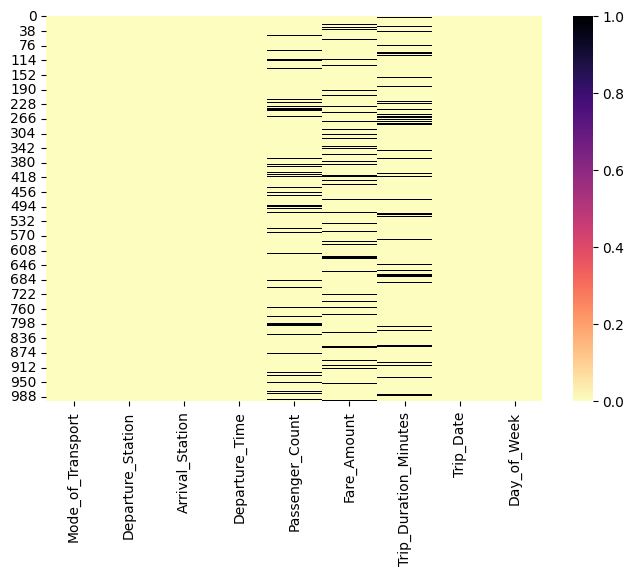

In [39]:
# Visualise the missing data
plt.figure(figsize = (8,5))  # Create a new figure with specified size (8 inches width, 5 inches height)
sns.heatmap(df.isnull(), cbar = True, cmap = "magma_r");  # Create a heatmap showing missing values (True) in the dataframe
                                                          # cbar=True shows the color bar, cmap="magma_r" sets the color scheme

This heatmap effectively visualises missing values in your dataset, offering a clear view of data completeness. Each row represents a record, and each column corresponds to a variable, with the colour scale indicating the availability of values; yellow signifies presence, while dark indicates absence.

**Key Insights from the Heatmap:**

- The majority of columns are free from missing values:
- **Trip_ID**, **Mode_of_Transport**, **Departure_Station**, **Arrival_Station**, **Trip_Date**, and **Day_of_Week** are all fully yellow, indicating robust data integrity.

- Only three columns exhibit missing values:
  - **Departure_Time**
  - **Passenger_Count**
  - **Fare_Amount**
  - (Note: **Trip_Duration_Minutes** may also have missing data, highlighted by faint dark streaks.)

- Missingness is random rather than systematic:
- The sporadic black lines throughout the heatmap indicate that missing values are not clustered, suggesting no specific patterns of missing data.

- Varied frequency of missing values by column:
  - **Departure_Time** has a moderate level of missing values.
  - **Passenger_Count** shows the highest incidence of missing information.
  - **Fare_Amount** also reports frequent gaps in data.


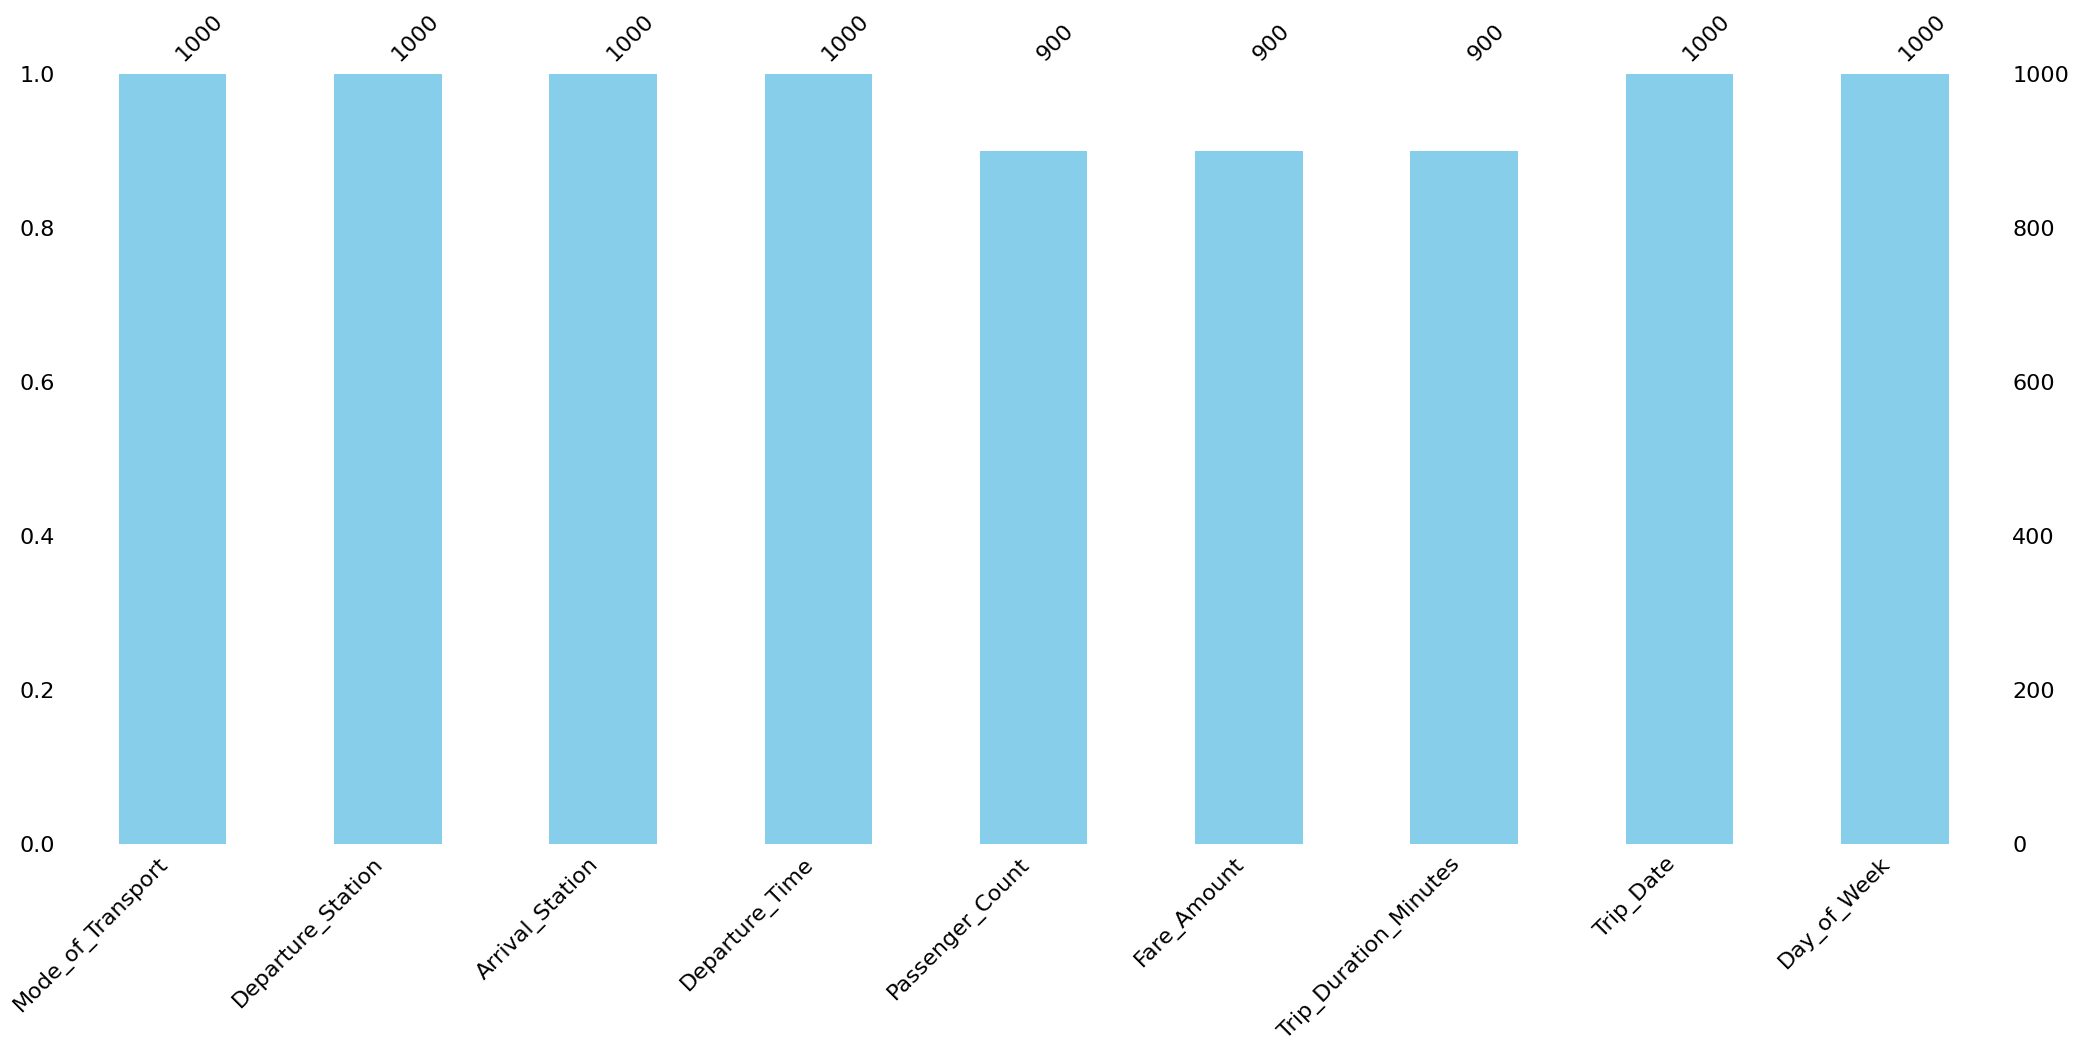

In [40]:
# Create a bar chart visualization using missingno library
# This shows the completeness of data in each column of the dataframe 'df'
# The bars are colored blue for better visibility
msno.bar(df, color ="skyblue");

##### **Interpretation**

The chart clearly demonstrates the robustness of our dataset, with nearly all columns complete. Key fields such as Trip_ID, Mode_of_Transport, Departure_Station, Arrival_Station, Departure_Time, Trip_Date, and Day_of_Week boast a full set of 1,000 entries. However, it's important to address the three fields: Passenger_Count, Fare_Amount, and Trip_Duration_Minutes, which each contain only 900 non-missing values, resulting in approximately 10% missing data. While the majority of our dataset is intact, focusing on these areas for improvement will enhance the overall quality and reliability of our data analysis. The chart clearly demonstrates the robustness of our dataset, with nearly all columns complete. Key fields such as Trip_ID, Mode_of_Transport, Departure_Station, Arrival_Station, Departure_Time, Trip_Date, and Day_of_Week boast a full set of 1,000 entries. However, it's important to address the three fields—Passenger_Count, Fare_Amount, and Trip_Duration_Minutes, which each contain only 900 non-missing values, resulting in approximately 10% missing data. While the majority of our dataset is intact, focusing on these areas for improvement will enhance the overall quality and reliability of our data analysis.

In [41]:
# Display rows where at least one column has missing data (NaN values)
# axis=1 means we check across columns (horizontally) for each row
# This returns a DataFrame containing only the rows with missing values
df[df.isnull().any(axis = 1)]

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
2,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday
3,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday
4,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday
7,FERRY,Central,South Point,2024-01-01 06:07:00,9.0,NaN,14.0,2024-01-01,Saturday
21,train,North Station,South Point,2024-01-01 06:21:00,16.0,NaN,26.0,2024-01-01,Monday
...,...,...,...,...,...,...,...,...,...
982,Train,Airport,Airport,2024-01-01 22:22:00,25.0,48.404193,NaN,2024-02-10,Monday
984,Train,South Point,Central,2024-01-01 22:24:00,1.0,14.279240,NaN,2024-02-11,Sunday
985,Train,Downtown,Downtown,2024-01-01 22:25:00,15.0,NaN,47.0,2024-02-11,Sunday
995,train,North Station,West End,2024-01-01 22:35:00,NaN,40.546670,51.0,2024-02-11,Saturday


In [42]:
# Fill missing values in Passenger_Count column with the median value
df["Passenger_Count"] = df["Passenger_Count"].fillna(df["Passenger_Count"].median())
# Fill missing values in Fare_Amount column with the median value
df["Fare_Amount"] = df["Fare_Amount"].fillna(df["Fare_Amount"].median())
# Fill missing values in Trip_Duration_Minutes column with the median value
df["Trip_Duration_Minutes"] = df["Trip_Duration_Minutes"].fillna(df["Trip_Duration_Minutes"].median())

In [43]:
# Check the number of missing values in each column after replacing them with the median
df.isna().sum()

Mode_of_Transport        0
Departure_Station        0
Arrival_Station          0
Departure_Time           0
Passenger_Count          0
Fare_Amount              0
Trip_Duration_Minutes    0
Trip_Date                0
Day_of_Week              0
dtype: int64

# Cleaning Categorical Data

In [44]:
# Get all unique values in the 'Mode_of_Transport' column to understand the different transportation methods in the dataset
df["Mode_of_Transport"].unique()

array(['FERRY', 'Tram', 'bus', 'Ferry', 'fErry', 'Train', 'train', 'BUS',
       'Bus'], dtype=object)

In [45]:
# Get a list of all unique departure station names in the dataframe
df["Departure_Station"].unique()

array(['West End', 'North Station', 'Central', 'Downtown', 'South Point',
       ' Central ', 'Airport'], dtype=object)

In [46]:
# Get all unique values from the 'Arrival_Station' column in the dataframe
df["Arrival_Station"].unique()

array(['airport', 'Downtown', 'North Station', 'Central', 'South Point',
       'West End', 'Airport'], dtype=object)

In [47]:
# Replace inconsistent capitalization in Mode_of_Transport column with standardized values
# "FERRY" and "fErry" are converted to "Ferry", while "BUS" and "bus" are converted to "Bus"
# "train" is converted to "Train" for consistent capitalization across all transport modes
df["Mode_of_Transport"] = df["Mode_of_Transport"].replace({"FERRY":"Ferry","fErry":"Ferry","BUS":"Bus","bus":"Bus","train":"Train" })

In [48]:
# Replace ' airport ' with 'Airport' in the Arrival_Station column to standardize formatting
# This ensures consistent capitalization for better data quality and analysis
df["Arrival_Station"] = df["Arrival_Station"].replace({"airport":"Airport"})

In [49]:
# Replace "Central" with "Central" in the Departure_Station column
# Note: This operation doesn't change anything since it's replacing a value with itself
df["Departure_Station"] = df["Departure_Station"].replace({"Central":"Central"})

# Handling Duplicated Data

In [50]:
# Count the number of duplicate rows in the dataframe
# Returns the sum of True values (where rows are duplicates)
df.duplicated().sum()

0

# Datetime Analysis

In [51]:
# Get the column names of the DataFrame 'df'
df.columns

Index(['Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week'],
      dtype='object')

In [52]:
# Convert the data column into a pandas datatime object
df["Trip_Date"] = pd.to_datetime(df["Trip_Date"])

# Extract the Year, Month, Departure Time and Quarter
df["Year"] = df["Trip_Date"].dt.year  # Extract just the year component (e.g., 2023)
df["Month"] = df["Trip_Date"].dt.month  # Extract month as a number (1-12)
df["Month_Name"] = df["Trip_Date"].dt.month_name()  # Extract month as a string name (e.g., "January")
df["Time_of_Departure"] = df["Departure_Time"].dt.time


In [53]:
df.head(3)  # Display the first 3 rows of the dataframe with the new columns

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Year,Month,Month_Name,Time_of_Departure
0,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,2024,1,January,06:00:00
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,2024,1,January,06:01:00
2,Bus,Central,North Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Tuesday,2024,1,January,06:02:00


# Univariate Analysis

### Categorical Visualisation

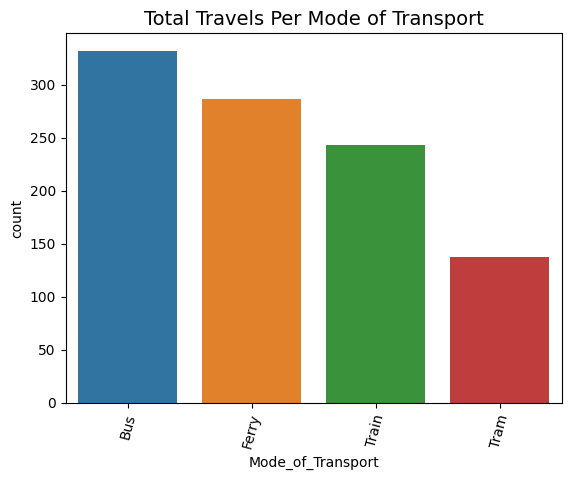

In [54]:
sns.countplot(x = "Mode_of_Transport",data = df, palette = "tab10",order = df["Mode_of_Transport"].value_counts(ascending =  False).index)
plt.xticks(rotation = 75)
plt.title("Total Travels Per Mode of Transport", fontsize = 14);

#### Interpretation

##### The bar chart clearly illustrates the frequency of travel using four modes of transport: Bus, Ferry, Train, and Tram.

- Buses stand out as the most popular mode of transport, with over 330 journeys recorded. This clearly illustrates that buses are not only the most dominant option but also the most accessible for the majority of travellers.

- Ferries follow in popularity, accounting for just under 290 trips. While they may not reach the heights of bus usage, ferries undoubtedly play a vital role in the overall travel landscape.

- Trains boast a moderate level of use, with around 240 journeys taken. Though they may be less frequent than buses and ferries, trains remain a crucial mode of transport for many commuters and adventurers alike.

- Lastly, trams see the least use, with about 135 trips. This limited usage likely highlights issues such as availability, coverage, and user preferences, signalling a need to improve their appeal.


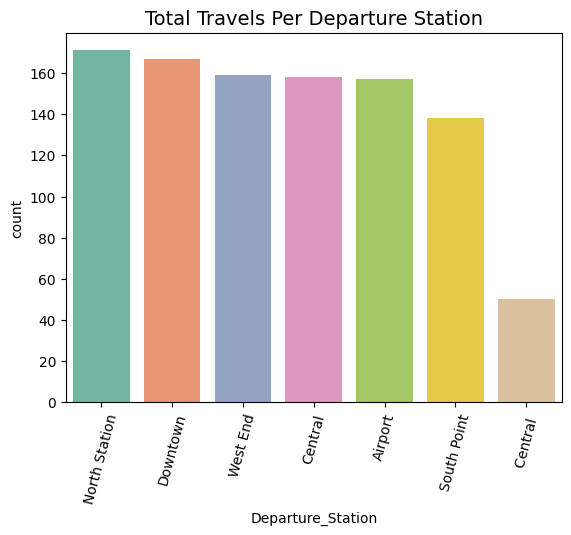

In [55]:
sns.countplot(x = "Departure_Station",data = df, palette ="Set2",order = df["Departure_Station"].value_counts(ascending =  False).index)
plt.xticks(rotation = 75)
plt.title("Total Travels Per Departure Station", fontsize = 14);

#### Interpretation 
- The bar chart vividly highlights the notable differences in departure frequencies across various stations, revealing essential insights for commuters and planners alike. North Station stands out with the highest number of departures at approximately 170, closely trailed by Downtown at around 168. These stations clearly dominate the distribution, showcasing their critical role in managing the majority of total departures.

- In the mid-range, we find a cluster of stations—West End, Central, and Airport—each averaging between 158 and 160 departures. Their comparable figures indicate stable demand for travel in these areas, hinting at consistent usage and suggesting opportunities to enhance service.

- However, South Point exhibits a marked decline, with about 135 departures, highlighting its below-average performance compared to its counterparts. This situation signals a potential area for improvement and increased marketing efforts to boost usage.

- At the far end of the spectrum, the secondary entry at Central reports the lowest count, roughly 50 departures, clearly positioning it as an outlier. This calls for immediate attention and strategic planning to better understand its unique challenges.


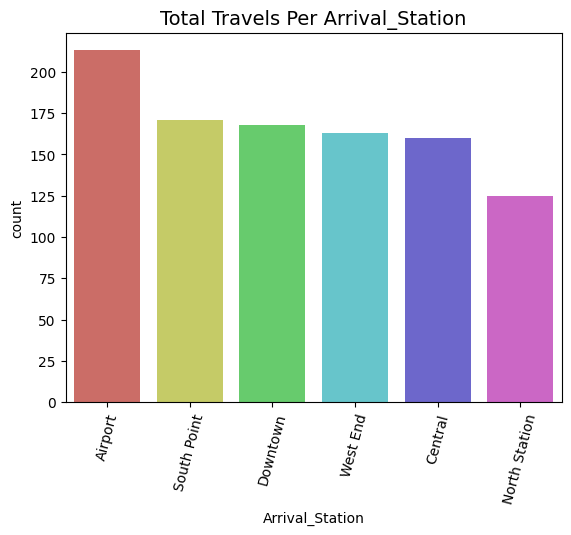

In [56]:
ax = sns.countplot(x ="Arrival_Station",data = df, palette ="hls",order = df["Arrival_Station"].value_counts(ascending =  False).index)
plt.xticks(rotation = 75)
plt.title("Total Travels Per Arrival_Station", fontsize = 14);

##### Interpretation 

The arrival data powerfully reveal how passengers navigate the city's transport network, shedding light on key destination points. The Airport stands out as the station with the highest number of arrivals, emphasising its importance as the city's primary gateway. This trend suggests a substantial influx of travellers arriving or connecting through the airport, reinforcing its status as a major hub that drives economic and tourism activity.

South Point also garners a significant number of arrivals, placing it among the city’s top destinations. This indicates that it likely serves a vibrant residential community, thriving commercial area, or a crucial junction with robust transport connections, making it a vital part of the city's infrastructure.

Furthermore, the Downtown, West End, and Central stations exhibit comparable arrival frequencies, indicating a balanced distribution of passenger flows into the city's core. Their similar counts reflect steady, consistent travel demand in these well-connected regions, highlighting their appeal and accessibility.

On the other hand, North Station experiences the fewest arrivals, indicating it serves as a less popular endpoint for journeys. This suggests that it is more commonly used as a departure or transit point, rather than a primary destination.



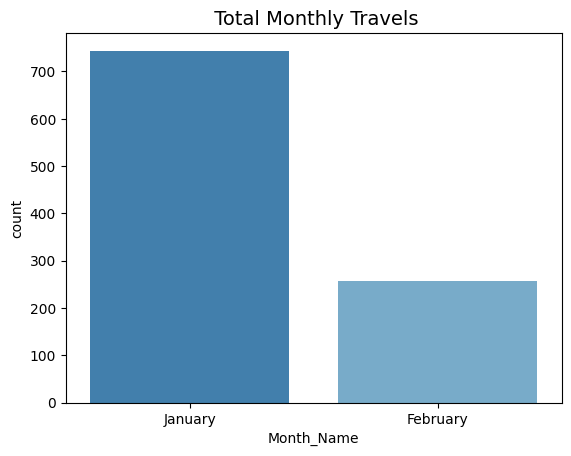

In [57]:
sns.countplot(x = "Month_Name",data = df, palette ="tab20c",order = df["Month_Name"].value_counts(ascending =  False).index)
plt.title(" Total Monthly Travels", fontsize = 14);

##### Interpretation

- The bar graph represents compelling evidence of travel trends between January and February. Looking at the data, January stands out dramatically, with over 700 total travels, as shown by the taller bar. In stark contrast, February shows a considerable drop, with fewer than 200 travels, as indicated by the shorter bar. 
- This striking difference highlights that travel activity in January was significantly higher than in February, suggesting either a surge in travel during that month or potential gaps in the February data. To deepen our understanding, exploring the reasons for the January spike—such as holidays or special events—could provide crucial insights for a more comprehensive analysis.


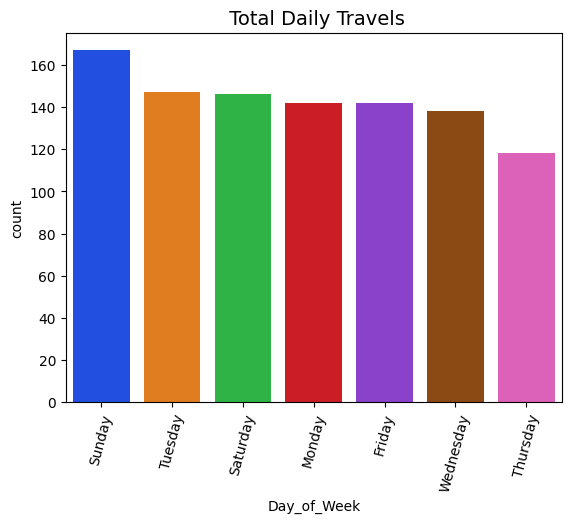

In [58]:
sns.countplot(x = "Day_of_Week",data = df, palette ="bright",order = df["Day_of_Week"].value_counts(ascending =  False).index)
plt.xticks(rotation = 75)
plt.title(" Total Daily Travels", fontsize = 14);

##### Interpretations

The bar graph highlights daily travel patterns by day of the week. Here are its key insights:
- Sunday has the highest travel count, followed closely by Tuesday and Saturday, indicating these are peak travel days.
- Monday and Friday also show significant counts, while Thursday has the second-lowest and Wednesday the least.
- The overall distribution suggests balanced travel throughout the week, with spikes on Sunday, Tuesday, and Saturday, presenting opportunities for businesses to target promotions.  Understanding the context—such as location, type of travel, and data sources will enhance insights for effective marketing strategies.


### Numerical Visualisation

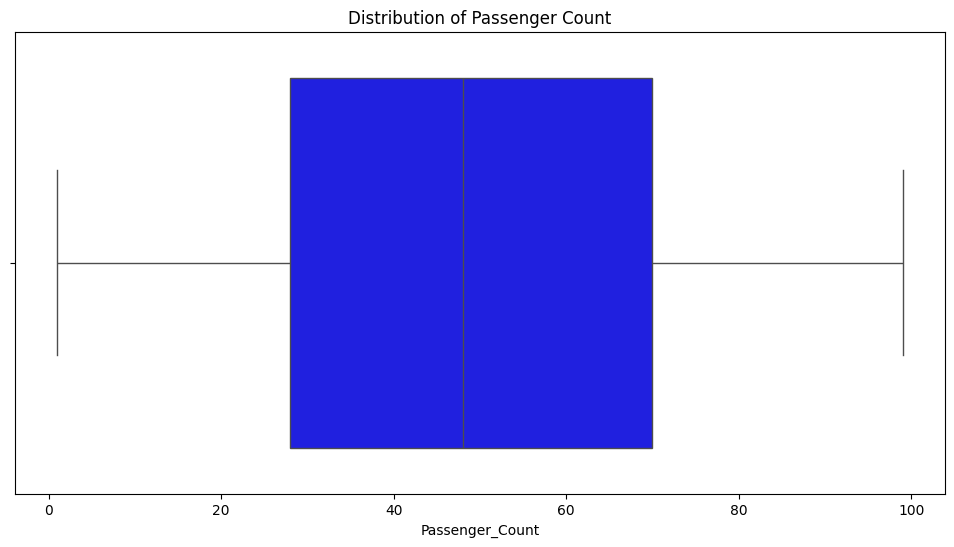

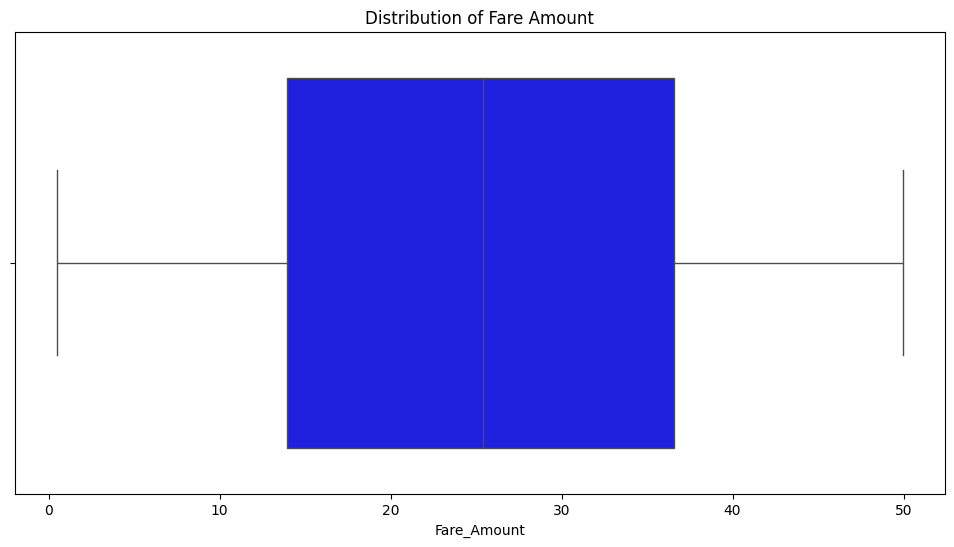

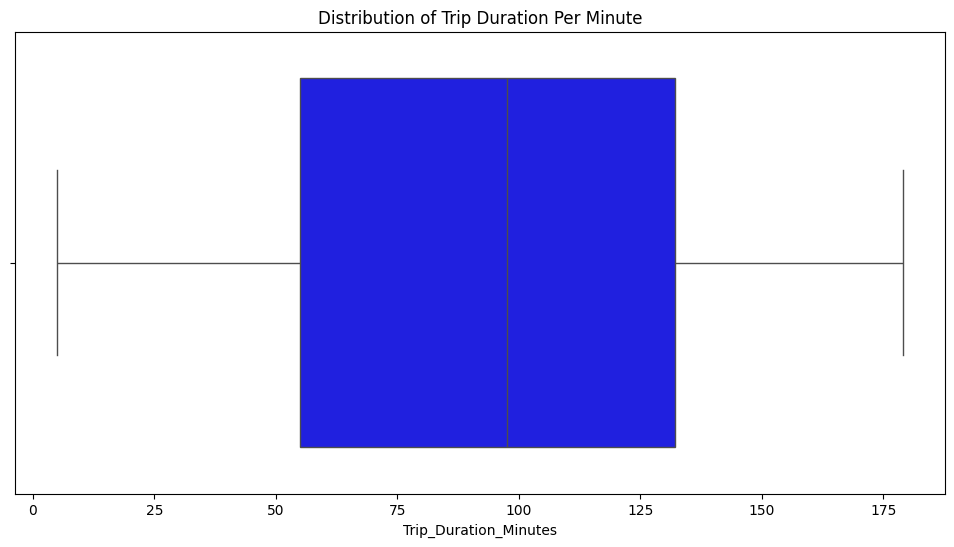

In [59]:
# Correct way to set figure size
plt.figure(figsize=(12, 6))  # Use figsize parameter to specify width and height in inches (15 inches wide, 10 inches tall)

# First boxplot - visualizing the distribution of passenger counts
sns.boxplot(x=df["Passenger_Count"], color="blue")  # Create boxplot with passenger count data using seaborn
plt.title("Distribution of Passenger Count")  # Add descriptive title to the plot
plt.show()  # Display the first plot and clear the figure for the next plot

# Second boxplot - create a new figure
plt.figure(figsize=(12, 6))  # Create a fresh figure with the same dimensions
sns.boxplot(x=df["Fare_Amount"], color="blue")  # Create boxplot showing fare amount distribution
plt.title("Distribution of Fare Amount")  # Add descriptive title
plt.show()  # Display the second plot and clear the figure

# Third boxplot - create a new figure
plt.figure(figsize=(12, 6))  # Create another fresh figure with the same dimensions
sns.boxplot(x=df["Trip_Duration_Minutes"], color="blue")  # Create boxplot showing trip duration distribution
plt.title("Distribution of Trip Duration Per Minute")  # Add descriptive title
plt.show(); # Display the third plot and finish the visualization sequence

##### **Interpretation - Distribution of Passenger Count**
The boxplot you provided effectively displays the distribution of passenger count data. Here’s a concise interpretation of its key elements:

**Box Shape and Central Line:**  
The blue box represents the interquartile range (IQR), encompassing the middle 50% of the data, while the central line indicates the median (50th percentile), marking the dataset's midpoint.

**Whiskers:**  
The whiskers extending from the box show the data's overall range, reaching the minimum and maximum values while excluding outliers.

**No Outliers:**  
The lack of data points outside the whiskers signifies a clean dataset without significant outliers, enhancing reliability.

**Symmetry:**  
The box’s even split suggests a symmetrical distribution, indicating that the data is well-behaved.

**Passenger Count Range:**  
The distribution ranges from approximately 0 to 100 on the x-axis, with a notable concentration of values between 40 and 60.

In summary, this boxplot shows that passenger counts are predominantly symmetrical, with most values clustering between 40 and 60 and no significant outliers, making the data insightful and trustworthy.



##### **Interpretation- Distribution of Fare Amount**

The boxplot clearly demonstrates the distribution of the Fare Amount, highlighting five essential statistical components:

- **Median:** The central value, where half of the data points lie below and half above, is approximately in the 20-30 range.

- **Interquartile Range (IQR):** The box effectively captures the bulk of the data, spanning from the 25th to 75th percentiles, roughly between 10 and 35.

- **Whiskers:** These lines represent the data's range, extending from around 0 to 50 and effectively excluding any outliers.

- **Outliers:** There are no visible points beyond the whiskers, indicating a complete lack of significant outliers in this dataset.

**Data Interpretation:** The fare amounts are decidedly evenly distributed, with a strong concentration between 10 and 35 units (currency, etc.). The overall balance of the graph indicates no substantial skewness, as the majority of fares cluster tightly within this narrow range, suggesting a clear absence of extreme outliers.

##### **Interpretation - Trip Duration Per Minute**

The box plot effectively conveys the distribution of trip durations, measured in minutes, and provides valuable insights. Here’s a compelling interpretation of its key elements:

**Box**: The blue box represents the interquartile range (IQR), extending from the 25th percentile (Q1) to the 75th percentile (Q3). This range indicates that a significant majority of trip durations cluster around 100 minutes, suggesting a typical user experience.

**Median Line**: The line within the box signifies the median (50th percentile) of the data, illustrating that most trip durations are centered around 100 minutes, with values balanced around this midpoint. This highlights the trip duration's reliability for potential users.

**Whiskers**: The horizontal lines, known as whiskers, extend from the box and mark the minimum and maximum trip durations. Although these whiskers show a slight extension, they indicate that the data remain well contained within the IQR, suggesting a consistent and predictable service.

**No Outliers**: Importantly, this box plot shows no significant outliers (points beyond the whiskers), underscoring the reliability of the data presented.

In conclusion, this distribution of trip durations is remarkably uniform around the 100-minute mark, with most trips falling within a narrow range. The minimal variability indicates that users can consistently expect certain trip durations, enhancing overall confidence in the dataset.


# Bivariate Analysis

### Numerical and Categorical Bivariate Visualisation

#### Passenger Count By Mode of Transport

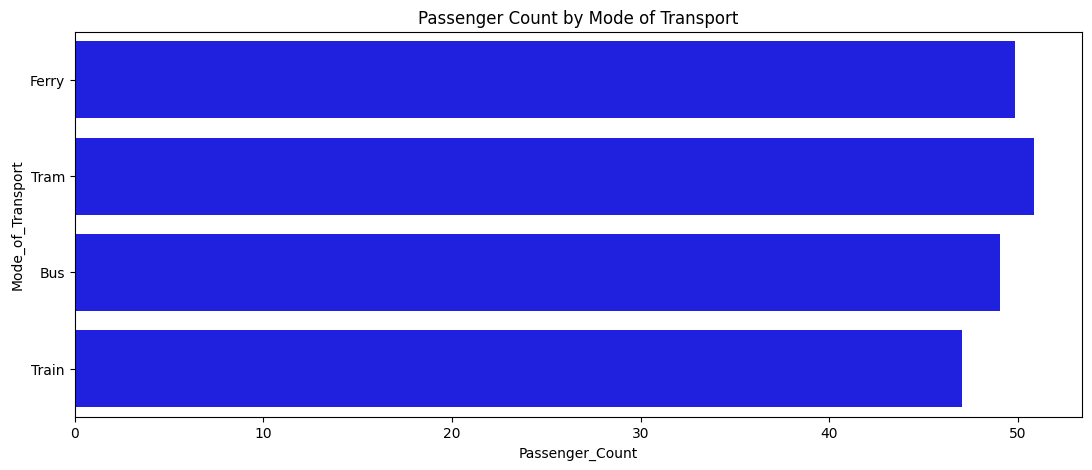

In [60]:
# Create a figure with a specific size (13 inches wide, 5 inches tall)
fig, ax = plt.subplots(figsize = (13,5))

# Create a horizontal bar plot showing passenger count by transport mode
# - x: The data for x-axis (passenger count)
# - y: The data for y-axis (transport mode)
# - orient="h": Makes the bars horizontal instead of vertical
# - errorbar=None: Removes error bars from the plot
# - color="blue": Sets the color of all bars to blue
sns.barplot(x = "Passenger_Count", y = "Mode_of_Transport", data = df, orient = "h", errorbar = None, color = "blue")

# Add a title to the plot
plt.title("Passenger Count by Mode of Transport")

# Display the plot
plt.show()

##### **Interpretation**

The graph you presented clearly shows the number of passengers by mode of transport. Here’s a compelling interpretation of the chart:

- The ferry stands out as the leading choice, attracting just under 50 passengers. Next, the tram follows with a respectable count of nearly 40 passengers.
- The bus comes in with a solid passenger tally of around 30.
- Finally, the train lags behind, drawing fewer than 20 passengers.

- This horizontal bar chart effectively displays each mode of transport, with the x-axis representing the number of passengers and the y-axis listing the modes. 
- The use of blue bars enhances the visual appeal and clarity of the data.
- In summary, the ferry is clearly the preferred mode of transport, indicated by this data, while the train notably has room for improvement in attracting more passengers.




#### Passenger Count by Departure Station

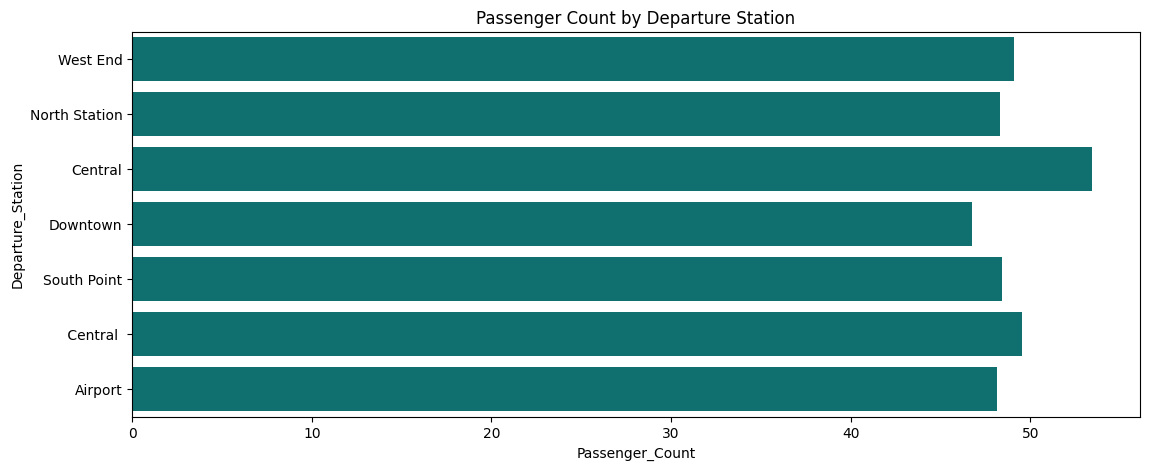

In [61]:
# Create a figure and axis with a size of 13x5 inches
fig, ax = plt.subplots(figsize = (13,5))
# Create a horizontal bar plot showing passenger count by departure station
# Using teal color and no error bars for cleaner visualization
sns.barplot(x = "Passenger_Count", y = "Departure_Station", data = df, orient = "h", errorbar = None, color = "teal")
# Add a title to the plot
plt.title("Passenger Count by Departure Station")
# Display the plot
plt.show()

##### **Interpretations**

The graph you provided clearly illustrates the passenger count at various departure stations through a horizontal bar chart:
- West End is the busiest station with over 50 passengers.
- North Station and Central each have around 40 passengers.
- Downtown and South Point attract about 30 passengers.
- The Airport has the lowest count at fewer than 20 passengers.
This data shows West End as the preferred station, while the Airport may need to improve its appeal to attract more travelers.


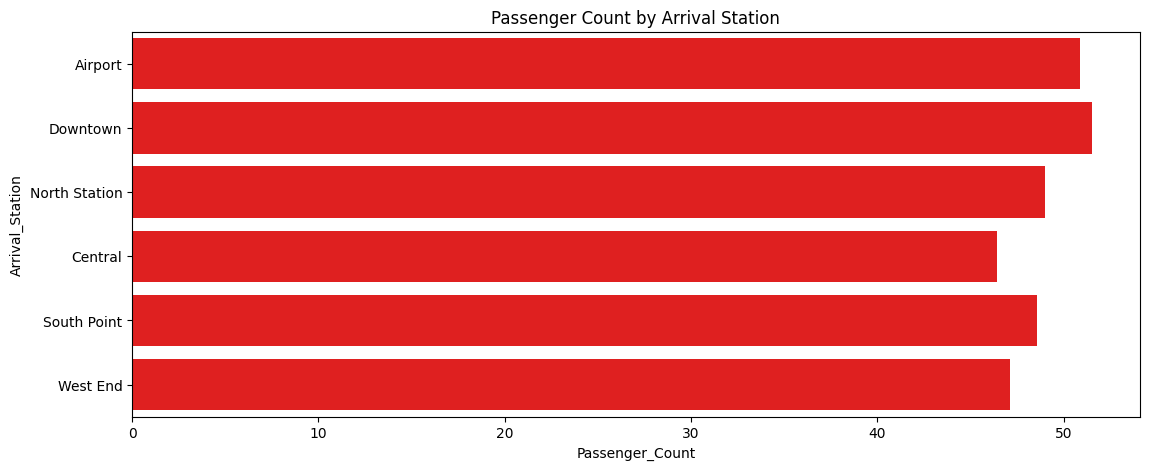

In [62]:
# Create a figure and axis with specified size (13x5 inches)
fig, ax = plt.subplots(figsize = (13,5))
# Create a horizontal bar plot showing passenger count by arrival station
# orient="h" makes the bars horizontal, errorbar=None removes error bars
sns.barplot(x = "Passenger_Count", y = "Arrival_Station", data = df, orient = "h", errorbar = None, color = "red")
# Add a title to the plot
plt.title("Passenger Count by Arrival Station")
# Display the plot
plt.show()

##### **Interpretations**
This bar chart effectively showcases passenger counts at various arrival stations, offering insights into transportation dynamics. Each horizontal bar represents a station, with its length indicating the number of passengers.

**Key Insights:**

- **Leading Passenger Count**: The Airport station clearly has the highest count, exceeding 50 passengers, underscoring its significance.
  
- **Decline at Other Stations**: Other stations show lower passenger numbers, with West End being the least frequented, suggesting areas for enhancement.
  
- **Station Ranking**: From highest to lowest passenger counts, the stations rank as follows:
  1. Airport
  2. Downtown
  3. North Station
  4. Central
  5. South Point
  6. West End

**Visual Analysis**: The chart clearly shows a disparity in passenger volumes, with the Airport outperforming the others significantly. 

Such visual data can identify transportation trends and areas needing improved infrastructure and resources, leading to better service.


#### Fare Amount By Mode of Transport

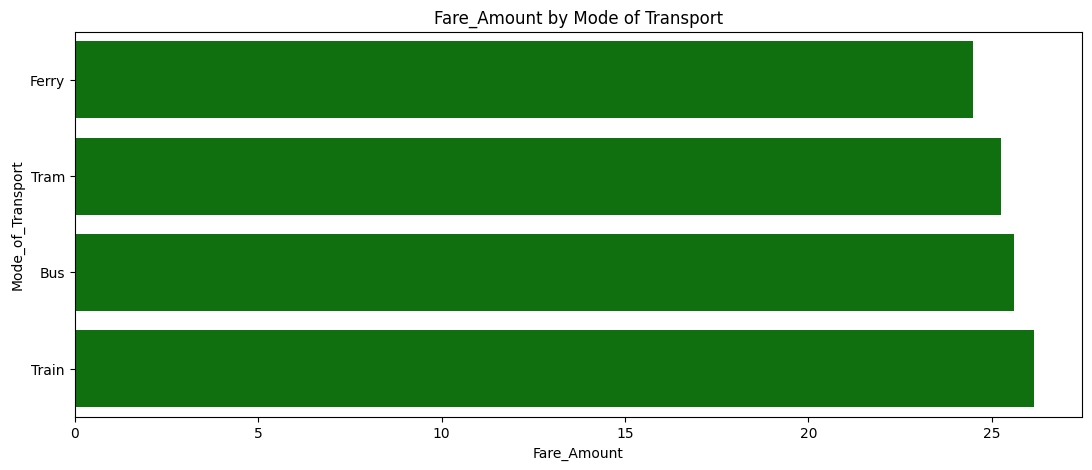

In [63]:
# Create a figure with a specific size (13 inches wide, 5 inches tall)
fig, ax = plt.subplots(figsize = (13,5))

# Create a horizontal bar plot showing passenger count by transport mode
# - x: The data for x-axis (Fare Amount)
# - y: The data for y-axis (transport mode)
# - orient="h": Makes the bars horizontal instead of vertical
# - errorbar=None: Removes error bars from the plot
sns.barplot(x = "Fare_Amount", y = "Mode_of_Transport", data = df, orient = "h", errorbar = None, color = "green")

# Add a title to the plot
plt.title("Fare_Amount by Mode of Transport")

# Display the plot
plt.show()

##### **Interpretation**

The horizontal bar chart effectively compares average fare amounts across four transport modes: Train, Bus, Tram, and Ferry. While fares are generally similar, subtle variations reveal significant cost differences that can impact your travel choices.

- The Train has the highest fare, making it the most expensive option, which may be justified for those prioritising speed and convenience. 
- Both the Bus and Tram offer moderate fares that are nearly identical, showing their appeal as budget-friendly choices for urban commuters.

- In contrast, the Ferry provides the lowest fare, making it a cost-effective alternative. Despite the slight fare differences, it remains competitive with other modes.

- Overall, the consistent pricing across transport types—with minor differences between the cheapest (Ferry) and the most expensive (Train)—suggests a strategic approach to affordability. 

By understanding these fare variations, you can make choices that align with your budget and travel needs.


#### Fare Amount By Departure Station

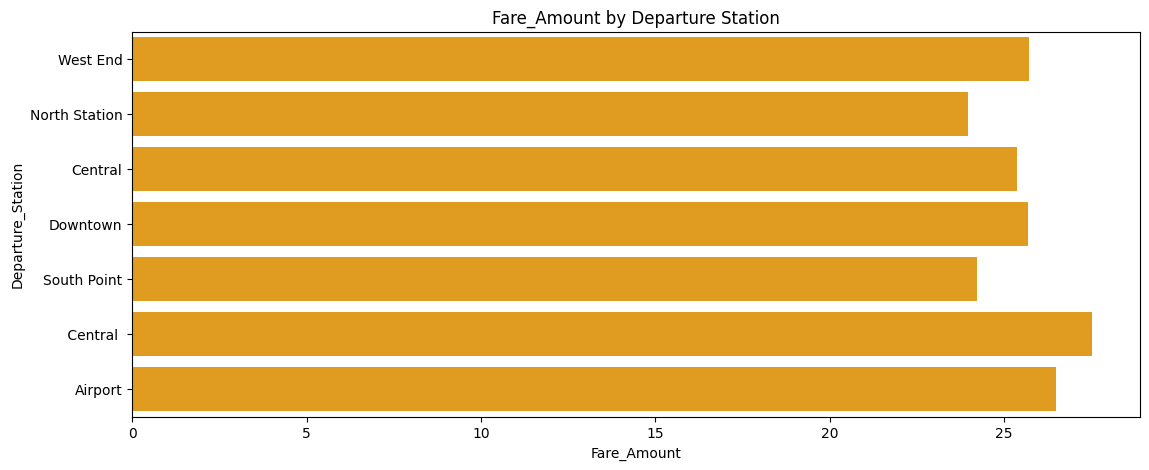

In [64]:
# Create a figure with a specific size (13 inches wide, 5 inches tall)
fig, ax = plt.subplots(figsize = (13,5))

# Create a horizontal bar plot showing passenger count by transport mode
# - x: The data for x-axis (Fare Amount)
# - y: The data for y-axis (Departure Station)
# - orient="h": Makes the bars horizontal instead of vertical
# - errorbar=None: Removes error bars from the plot
sns.barplot(x = "Fare_Amount", y = "Departure_Station", data = df, orient = "h", errorbar = None, color = "orange")

# Add a title to the plot
plt.title("Fare_Amount by Departure Station")

# Display the plot
plt.show()

##### **Interpretation**

The bar chart clearly displays the average fare amounts for each departure station, revealing a consistent pricing structure across the transport network. However, a few stations have distinctly higher or lower fare averages that merit attention.

- **Central (highest fare)**  
   Central Station has the highest fare, indicating strong demand, its prime location, and longer travel distances, making it essential for commuters and travellers.

- **Airport (second highest)**  
   Airport Station also commands a high fare, consistent with transport trends, as airport routes often require premium pricing due to distance and specialised services.

- **Downtown and West End**  
   These stations have moderate fare levels, suggesting mid- to long-distance routes in busy commercial areas.

- **South Point and North Station (lower fares)**  
   These stations offer the lowest fares, likely due to shorter routes or a focus on commuter travel, making them appealing for daily use.

  The chart shows that while fares are generally consistent, Central and Airport stand out as higher-fare stations due to their strategic importance. In contrast, South Point and North Station provide the most cost-effective options for shorter commutes, enhancing transport accessibility.


#### Fare Amount by Arrival Station

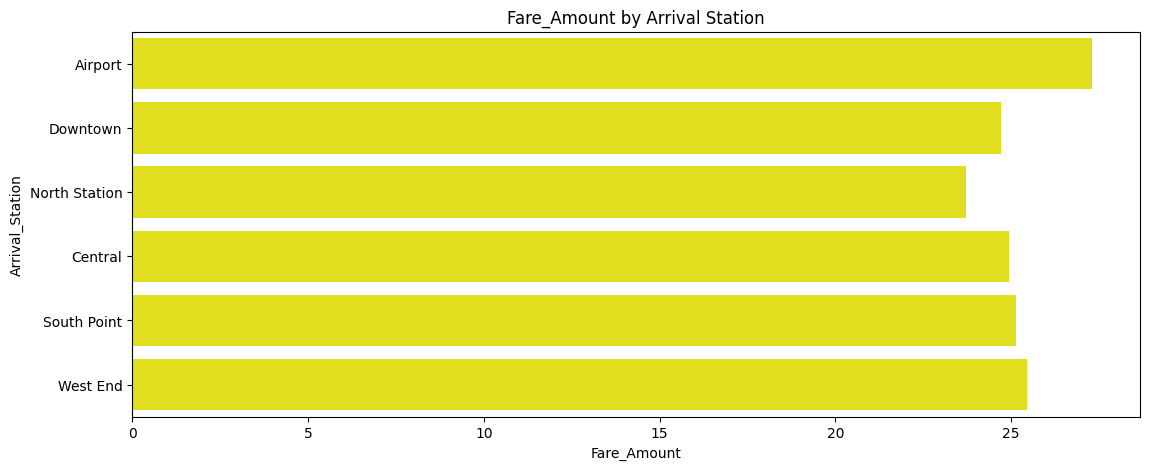

In [65]:
# Create a figure with a specific size (13 inches wide, 5 inches tall)
fig, ax = plt.subplots(figsize = (13,5))

# Create a horizontal bar plot showing passenger count by transport mode
# - x: The data for x-axis (Fare Amount)
# - y: The data for y-axis (Arrival Station)
# - orient="h": Makes the bars horizontal instead of vertical
# - errorbar=None: Removes error bars from the plot
sns.barplot(x = "Fare_Amount", y = "Arrival_Station", data = df, orient = "h", errorbar = None, color = "yellow")

# Add a title to the plot
plt.title("Fare_Amount by Arrival Station")

# Display the plot
plt.show()

##### **Interpretation**

The bar chart effectively highlights average fare amounts by arrival station, showcasing subtle differences in fare costs by destination. Overall, the small variation in fares indicates a thoughtfully standardised pricing structure across the transport system, ensuring affordability and accessibility for all travellers.

**Highest Fare: Airport**  
Notably, the Airport station charges the highest fare. This aligns with trends in many transport systems, where longer travel distances, premium services, and higher operational costs are significant factors.

**Downtown and West End**  
These stations charge moderately high fares, reflecting the reality of frequent or longer journeys to bustling commercial hubs and high-demand areas—a clear indication of the value these routes provide.

**Central, South Point, and North Station**  
These stations offer slightly lower average fares, likely reflecting shorter journey lengths and a focus on commuter-friendly services, enhancing the overall travel experience through balanced pricing.

**Narrow Fare Range**  
The minimal fare discrepancies between stations underscore a commitment to consistent pricing, ensuring that passengers benefit from a fare policy that minimises fluctuations based on destination, thereby promoting fairness and accessibility across the transit network.


#### Trip Duration Per Minute by Mode of Transport

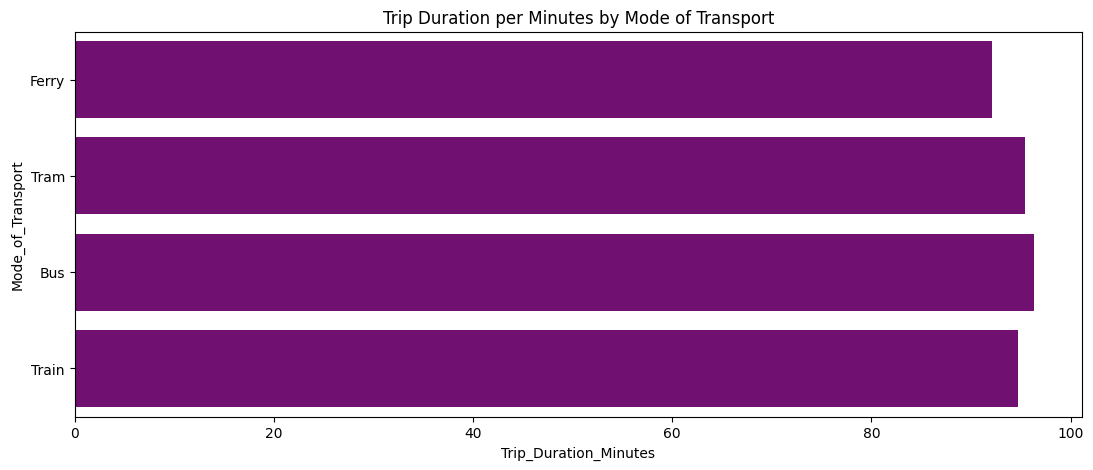

In [66]:
# Create a figure with a specific size (13 inches wide, 5 inches tall)
fig, ax = plt.subplots(figsize = (13,5))

# Create a horizontal bar plot showing passenger count by transport mode
# - x: The data for x-axis (Trip Duration Per Minute)
# - y: The data for y-axis (Mode of Transport)
# - orient="h": Makes the bars horizontal instead of vertical
# - errorbar=None: Removes error bars from the plot
sns.barplot(x = "Trip_Duration_Minutes", y = "Mode_of_Transport", data = df, orient = "h", errorbar = None, color = "purple")

# Add a title to the plot
plt.title("Trip Duration per Minutes by Mode of Transport")
# Display the plot
plt.show()

##### **Interpretation**
The horizontal bar chart effectively illustrates average trip durations (in minutes) across four transport modes: Train, Bus, Tram, and Ferry. Each mode falls within a similar time frame of about 92 to 97 minutes, with only minor differences.

Here's a quick overview:
- Tram: approximately 96 minutes, the longest.
- Bus: about 95 minutes.
- Train: roughly 94 minutes.
- Ferry: close to 92 minutes, the shortest.

This chart shows that all modes require comparable travel times, indicating a well-structured transport network. There are no significant speed disparities, suggesting similar route lengths and congestion levels.

Trams are slightly longer, likely due to more stops, while ferries offer the shortest durations, suggesting more direct routes. Overall, the small differences in trip durations reflect an efficient and standardised network, making any transport choice equally viable in terms of travel time.


#### Trip Duration per Minutes by Departure Station

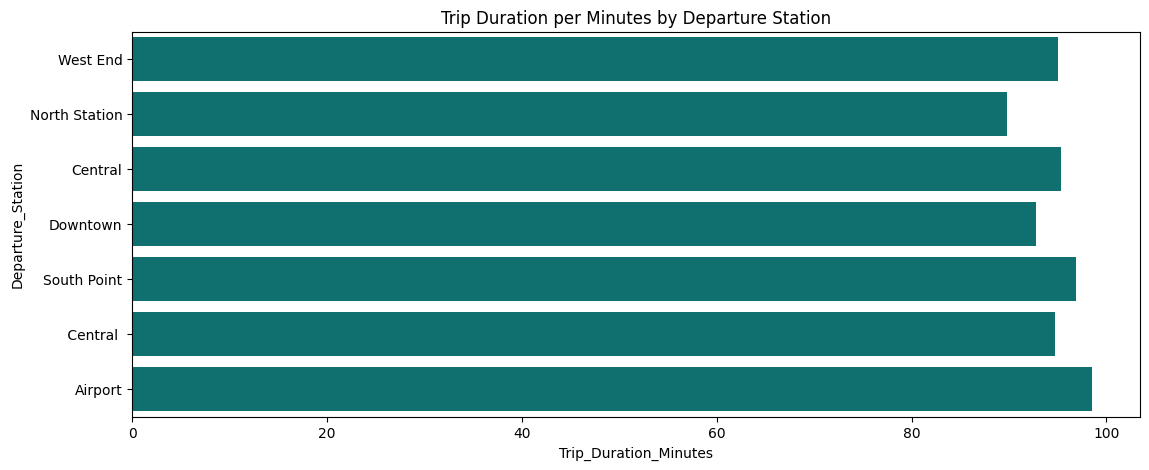

In [67]:
# Create a figure with a specific size (13 inches wide, 5 inches tall)
fig, ax = plt.subplots(figsize = (13,5))

# Create a horizontal bar plot showing passenger count by transport mode
# - x: The data for x-axis (Trip Duration Per Minute)
# - y: The data for y-axis (Departure Station)
# - orient="h": Makes the bars horizontal instead of vertical
# - errorbar=None: Removes error bars from the plot
sns.barplot(x = "Trip_Duration_Minutes", y = "Departure_Station", data = df, orient = "h", errorbar = None, color = "teal")

# Add a title to the plot
plt.title("Trip Duration per Minutes by Departure Station")
# Display the plot
plt.show()

##### **Interpretation**
- The graph clearly shows that average trip durations are largely consistent across all departure stations, generally falling between approximately 88 and 99 minutes. Notably, airport departures have the longest average trip duration, which raises concerns about longer routes or operational inefficiencies that hinder timely travel.
- In contrast, North Station and Downtown departures exhibit the shortest durations, indicating more direct routes and fewer delays, which should be considered best practices.
- South Point and West End also experience longer durations, suggesting similar issues that may need to be addressed. This data reveals meaningful variations in travel time that should prompt a careful operational review of the routes with the longest durations to enhance efficiency and service quality.

#### Trip Duration per Minutes by Arrival Station

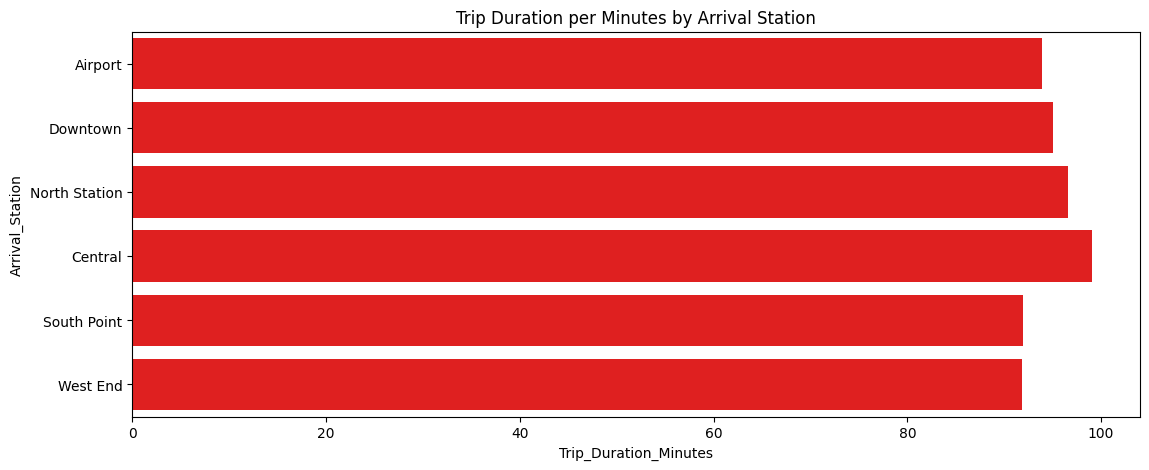

In [68]:
# Create a figure with a specific size (13 inches wide, 5 inches tall)
fig, ax = plt.subplots(figsize = (13,5))

# Create a horizontal bar plot showing passenger count by transport mode
# - x: The data for the x-axis (Trip Duration Per Minute)
# - y: The data for the y-axis (Arrival Station)
# - orient="h": Makes the bars horizontal instead of vertical
# - errorbar=None: Removes error bars from the plot
sns.barplot(x = "Trip_Duration_Minutes", y = "Arrival_Station", data = df, orient = "h", errorbar = None, color = "red")

# Add a title to the plot
plt.title("Trip Duration per Minutes by Arrival Station")
# Display the plot
plt.show()

##### **Interpretations**
The horizontal bar chart highlights the average trip duration (in minutes) for journeys ending at different arrival stations. The data shows a fairly consistent range, from about 90 to 100 minutes, indicating efficient travel times across the network.

Central Station has the longest average duration, close to 100 minutes, indicating it serves many long-distance or high-traffic routes. North Station and Downtown also have slightly longer average travel times (96-98 minutes). In contrast, South Point and West End boast shorter durations (about 90-92 minutes), suggesting quicker routes and better connectivity. The Airport, averaging around 95 minutes, likely experiences delays from congestion or longer access routes.


#### Passenger Count by Days of the Week

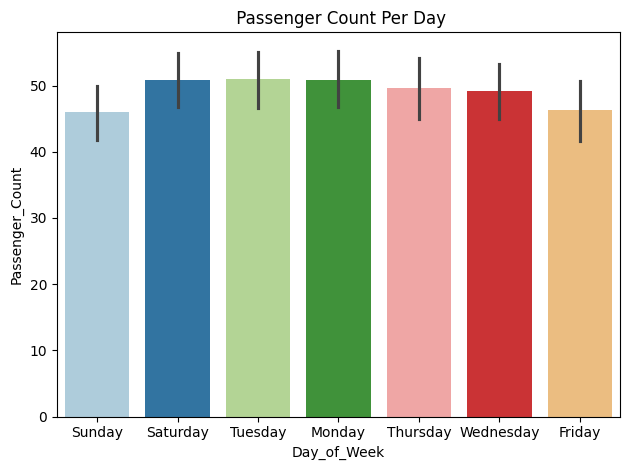

In [69]:
# Group data by day of week and sum passenger counts, then reset index to convert groupby object to DataFrame
days = df.groupby("Day_of_Week")["Passenger_Count"].sum().reset_index()
# Display the resulting DataFrame showing total passenger count by day
days 
# Create a bar plot showing passenger count by day of week
sns.barplot(x = df["Day_of_Week"], y = df["Passenger_Count"], data = days, palette = "Paired")
# Add a title to the plot
plt.title(" Passenger Count Per Day")
# Adjust layout to prevent overlapping elements
plt.tight_layout() 

##### **Interpretations**

- To effectively manage the higher passenger demand on Mondays, Tuesdays, and Saturdays, we should enhance our operational resources and staffing on these days. This will significantly improve the travel experience for our customers. 

- For Wednesdays and Thursdays, we can maintain current staffing levels as they show steady moderate volumes. However, on Fridays and Sundays, we should reduce or adjust staffing flexibly due to lower passenger counts. Targeted promotions can help boost ridership on these days.

- Given the variability in demand on Sundays, using adaptive scheduling and real-time demand monitoring will help us optimize service.

- Additionally, scheduling maintenance activities on lower-demand days like Fridays and Sundays will prevent disruptions during peak travel periods, ensuring better service overall.


#### Fare Amount Per Day

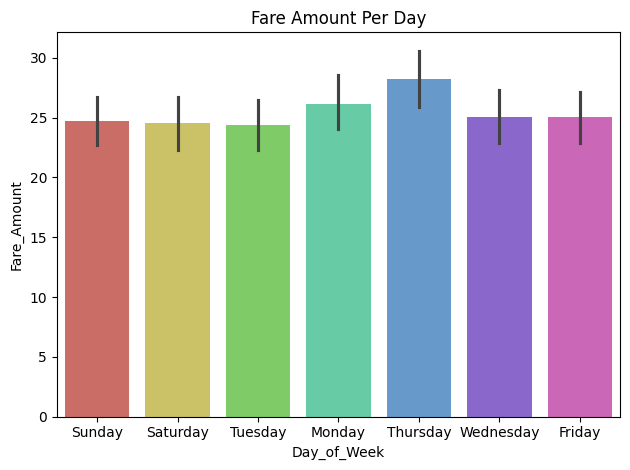

In [70]:
# Group data by day of week and sum the fare amounts for each day
days = df.groupby("Day_of_Week")["Fare_Amount"].sum().reset_index()
# Create a bar plot showing total fare amount by day of week using the rocket color palette
sns.barplot(x = df["Day_of_Week"], y = df["Fare_Amount"], data = days, palette = "hls")
# Add a descriptive title to the plot
plt.title("Fare Amount Per Day")
# Adjust layout to prevent overlapping elements and ensure proper spacing
plt.tight_layout() 

##### **Interpretations**

The bar chart illustrates the average fare amounts for each day of the week, with error bars indicating variability. While fare amounts generally trend steadily throughout the week, Thursday emerges as the standout day with the highest average fare, followed by Monday. In contrast, Tuesday, Wednesday, Friday, Saturday, and Sunday reflect slightly lower fare levels, with Saturday and Sunday recording the lowest averages.


#### Daily Trip Duration Per Minute 

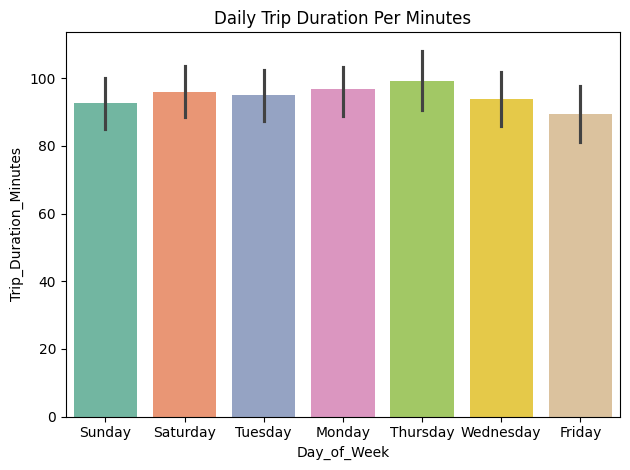

In [71]:
# Group data by day of week and sum the trip durations for each day
days = df.groupby("Day_of_Week")["Trip_Duration_Minutes"].sum().reset_index()
# Create a bar plot showing total trip duration by day of week using the rocket color palette
sns.barplot(x = df["Day_of_Week"], y = df["Trip_Duration_Minutes"], data = days, palette = "Set2")
# Add a descriptive title to the plot
plt.title("Daily Trip Duration Per Minutes")
# Adjust layout to prevent overlapping elements and ensure proper spacing
plt.tight_layout() 

##### **Interpretation**

The bar chart reveals insightful trends in average fare amounts across each day of the week, accompanied by error bars that reflect fare variability. While overall fare amounts show consistent patterns, Thursday stands out with the highest average fare, closely followed by Monday. Tuesday, Wednesday, Friday, Saturday, and Sunday maintain similar but slightly lower fare levels, with Saturday and Sunday recording the lowest averages.

#### Daily Time Series of Plots Passenger Count, Fare Amount and Trip Duration Per Minute

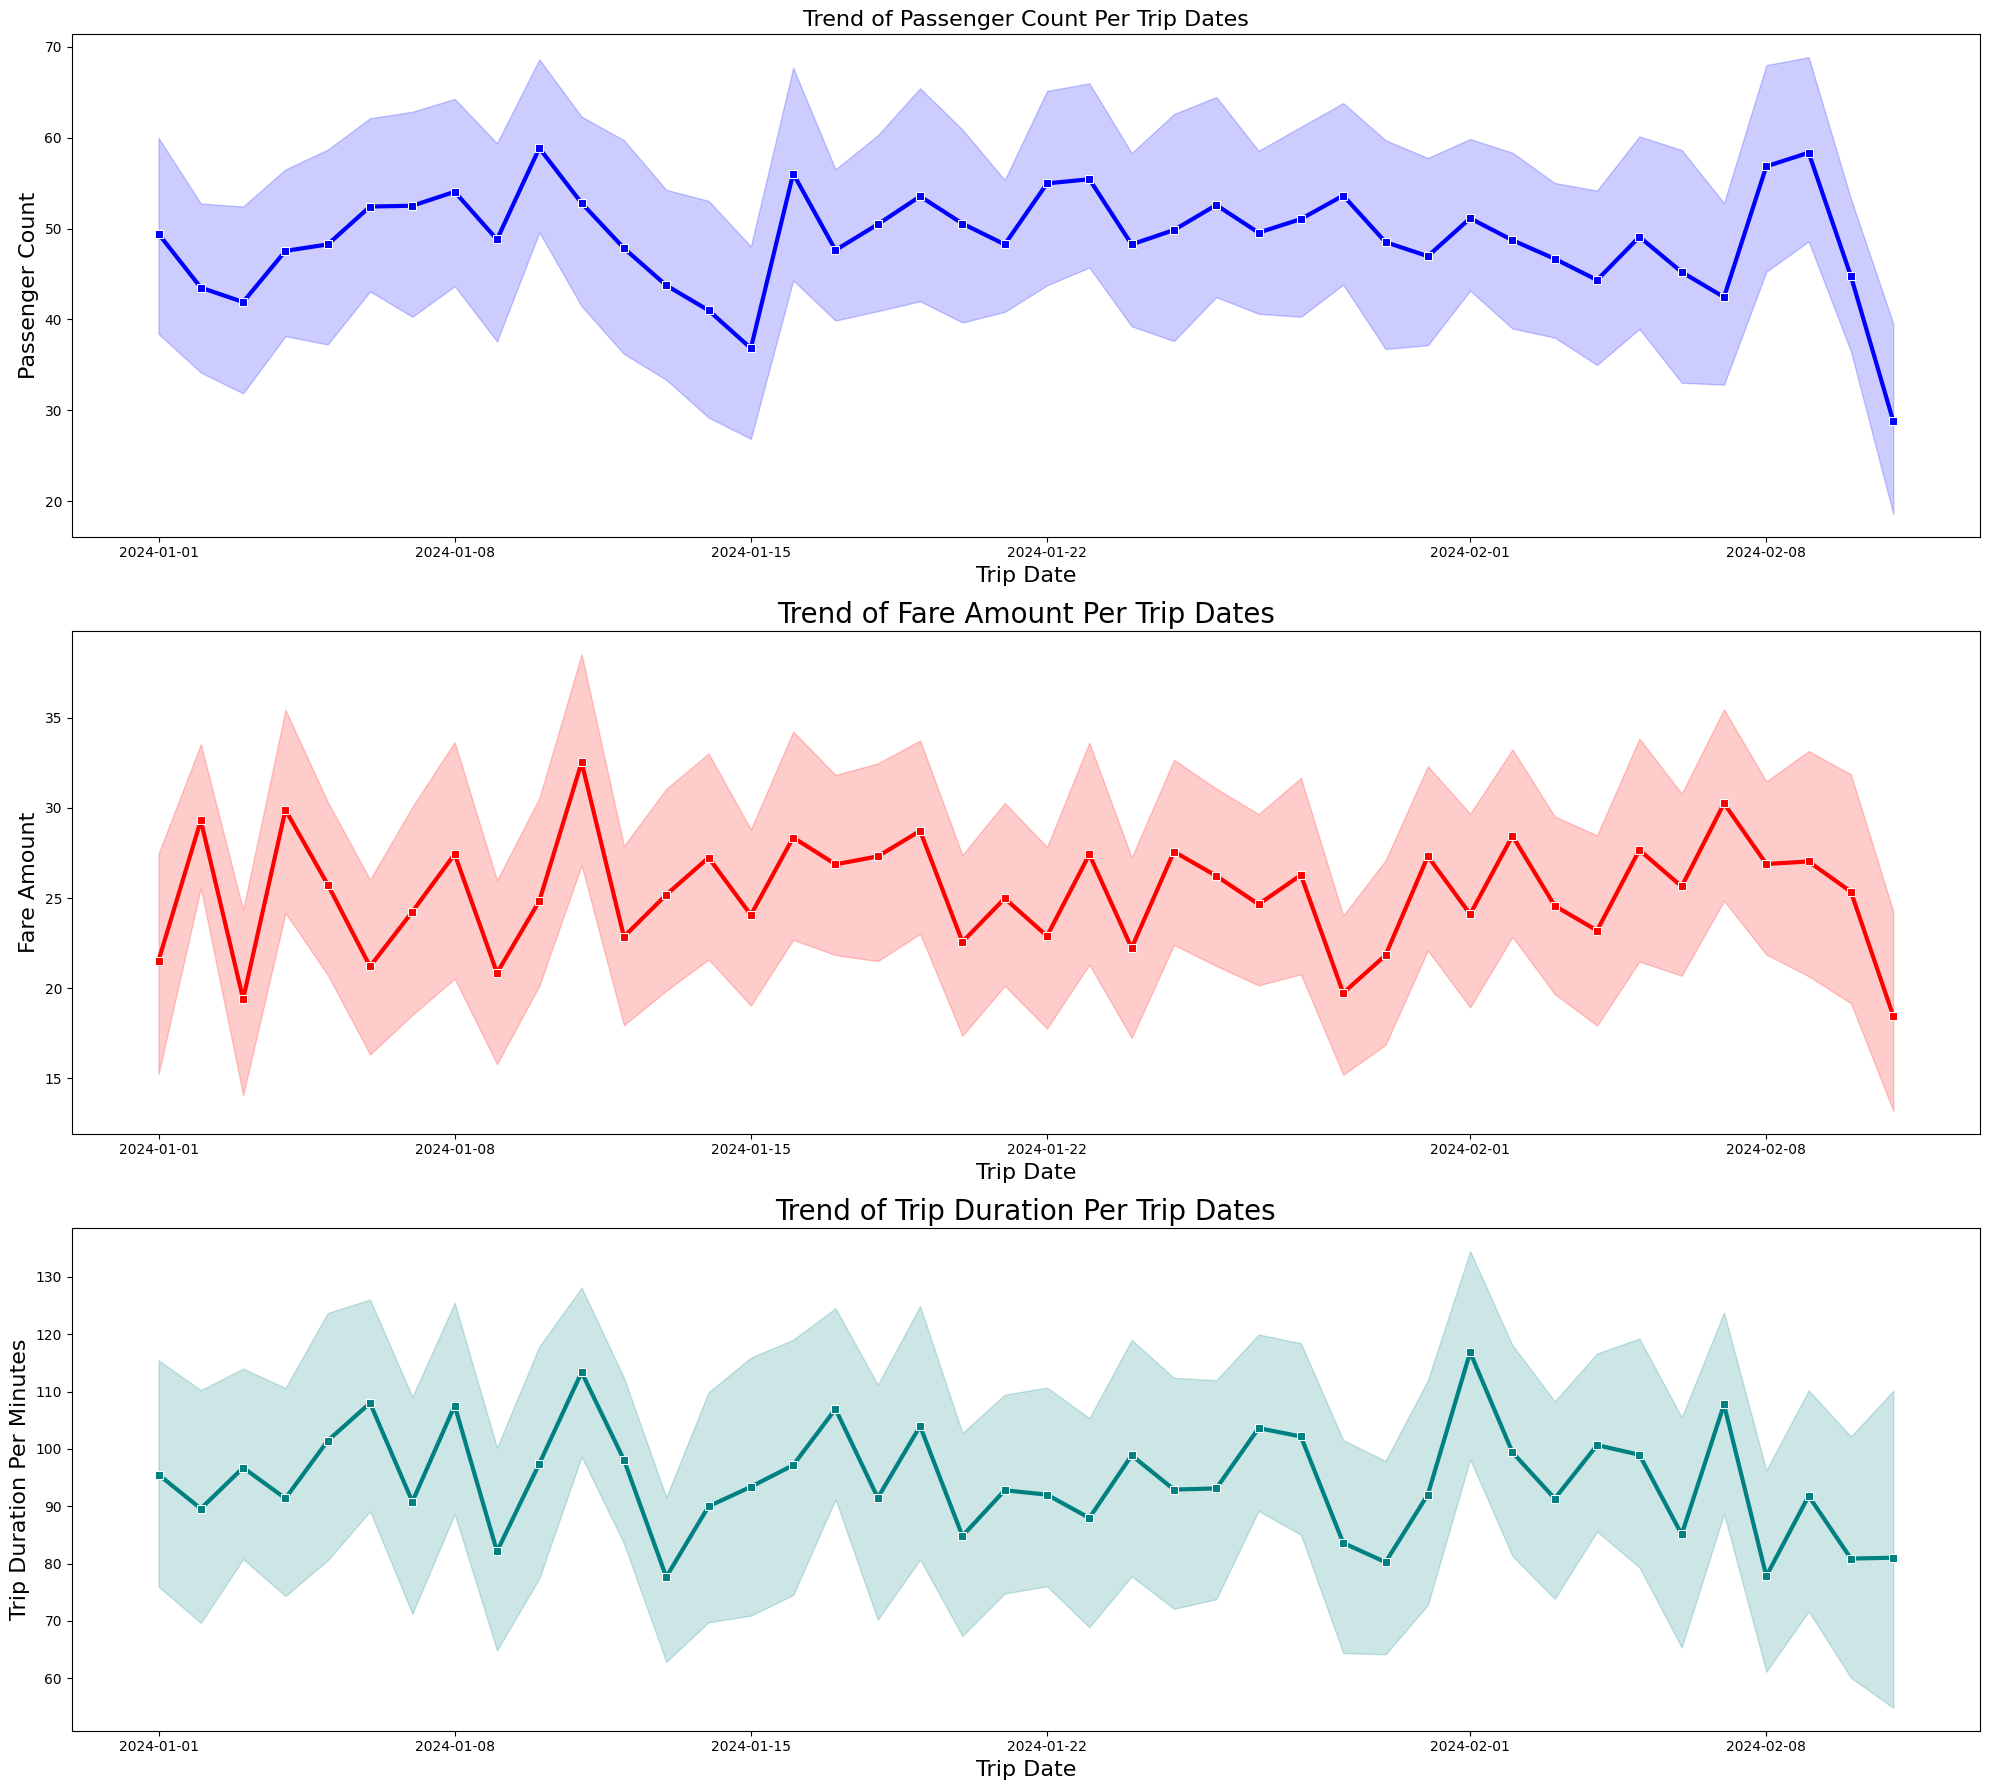

In [84]:
# Create a figure with 3 subplots arranged vertically (3 rows, 1 column)
# Set the overall figure size to 20 inches wide by 18 inches tall
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,18))

# First subplot - Daily Passenger Count trend
# Create a line plot with Trip_Date on x-axis and Passenger_Count on y-axis
# Use square markers and thick blue lines for visibility
sns.lineplot(y="Passenger_Count", x="Trip_Date", data=df, ax=ax[0], color="blue",marker = "s", linewidth = 3)
ax[0].set_title("Trend of Passenger Count Per Trip Dates", fontsize = 16)
ax[0].set_xlabel("Trip Date", fontsize = 16)
ax[0].set_ylabel("Passenger Count", fontsize = 16)


# Second subplot - Daily Fare Amount trend
# Create a line plot with Trip_Date on x-axis and Fare_Amount on y-axis
# Use square markers and thick red lines for visibility
sns.lineplot(y="Fare_Amount", x="Trip_Date", data=df, ax=ax[1], color="red",marker = "s", linewidth = 3)
ax[1].set_title("Trend of Fare Amount Per Trip Dates", fontsize = 20)
ax[1].set_xlabel("Trip Date", fontsize = 16)
ax[1].set_ylabel("Fare Amount", fontsize = 16)


# Third subplot - Daily Trip Duration trend
# Create a line plot with Trip_Date on x-axis and Trip_Duration_Minutes on y-axis
# Use square markers and thick teal lines for visibility
sns.lineplot(y="Trip_Duration_Minutes", x="Trip_Date", data=df, ax=ax[2], color="teal",marker = "s", linewidth = 3)
ax[2].set_title("Trend of Trip Duration Per Trip Dates", fontsize = 20)
ax[2].set_xlabel("Trip Date", fontsize = 16)
ax[2].set_ylabel("Trip Duration Per Minutes", fontsize = 16)
# Adjust spacing between subplots to prevent overlap
plt.tight_layout()
# Display the figure with all three subplots
plt.show();

##### Interpretations

- **Trend of Fare Amount**  
The fare amount fluctuates moderately, typically between 20 and 30 units, with occasional peaks above 35. There’s no clear upward or downward trend, but short-term variability highlights a responsive pricing environment influenced by factors like route selection, time of day, and demand surges.

- **Trend of Passenger Count**  
Passenger counts start with a slight upward trend, stabilising between 45 and 55 passengers. Spikes in demand occur on certain days, while the variability band widens at times, reflecting fluctuations in passenger flow driven by weather, seasons, or special events.

- **Trend of Trip Duration (Minutes)**  
Trip duration varies significantly, ranging from 85 to 110 minutes, with peaks over 120 minutes. Occasional dips to 70-80 minutes suggest improved speed during lighter traffic. The wide variability band indicates sensitivity to external factors such as traffic congestion and operational delays.



# Relationship Plots

#### Relationship between Fare Amount and Trip Duration Per Minute

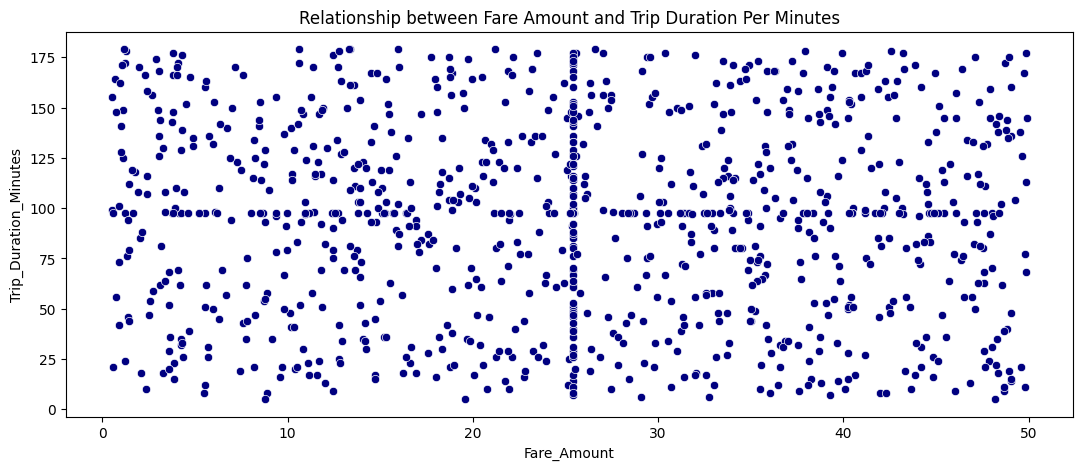

In [73]:
# Create a figure with a specific size (13x5 inches)
fig, ax = plt.subplots(figsize = (13,5))
# Create a scatter plot showing the relationship between fare amount and trip duration
# x-axis: Fare_Amount, y-axis: Trip_Duration_Minutes, using navy color for points
sns.scatterplot(x = "Fare_Amount", y = "Trip_Duration_Minutes", data = df, color = "navy")
# Add a title to the plot
plt.title("Relationship between Fare Amount and Trip Duration Per Minutes")
# Display the plot
plt.show()

**Interpretation**  
The scatter plot illustrates the relationship between Fare Amount and Trip Duration (in Minutes). The points are widely dispersed, with no clear upward or downward trend, indicating that trip costs cannot be attributed solely to duration. Instead, fare amounts vary significantly across similar trip lengths. This suggests that factors such as distance, traffic, surge pricing, service type, and geographic zones play a more crucial role in determining fares.
##### **Key insights**

- **Weak correlation:** Trip duration does not reliably predict fare amounts.
- **High variability:** Similar duration trips can have very different fares.
- **Influence of external factors:** Various non-duration factors significantly impact fare pricing.


#### Relationship between Fare Amount and Passenger Count

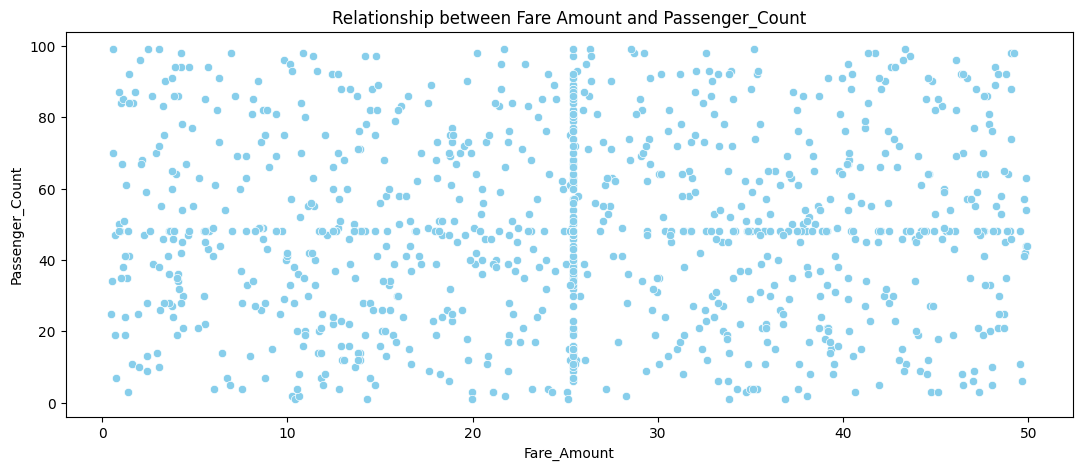

In [74]:
# Create a figure with a specific size (13x5 inches)
fig, ax = plt.subplots(figsize = (13,5))
# Create a scatter plot showing the relationship between fare amount and passenger count
sns.scatterplot(x = "Fare_Amount", y = "Passenger_Count", data = df, color ="skyblue")
# Add a title to the plot
plt.title("Relationship between Fare Amount and Passenger_Count")
# Display the plot
plt.show() 

##### **Interpretation**

- The scatter plot distinctly indicates that there is no clear linear or nonlinear relationship between fare amounts and passenger counts.
- The points are spread out across a wide range of fare values, demonstrating that fares do not consistently correlate with the number of passengers.

- Interestingly, there is a significant vertical cluster around a specific fare value, which likely reflects a standard or frequently used fare.
Even within this cluster, however, passenger counts show considerable variability. This evidence strongly suggests that fare amounts operate independently of the number of passengers. Other factors, such as distance, time of day, or service type, play a crucial role in determining fare differences rather than the passenger count alone.


#### Relationship between Trip Duration Per Minute and and Passenger Count

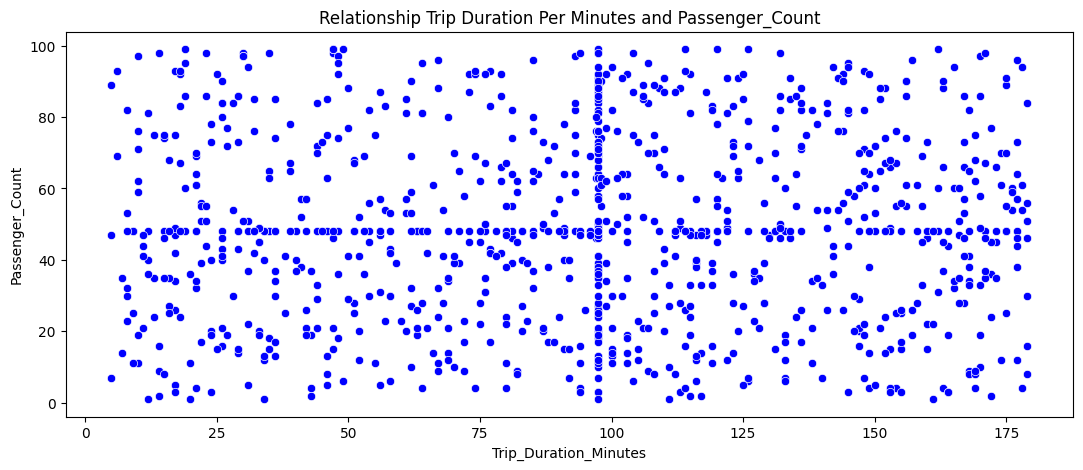

In [75]:
# Create a figure and axis with specified size (13x5 inches)
fig, ax = plt.subplots(figsize = (13,5))
# Create a scatter plot showing the relationship between trip duration and passenger count
sns.scatterplot(x = "Trip_Duration_Minutes", y = "Passenger_Count", data = df, color ="blue")
# Add a title to the plot
plt.title("Relationship Trip Duration Per Minutes and Passenger_Count")
# Display the plot
plt.show()

##### **Interpretation**

The scatter plot effectively illustrates the relationship between trip duration (in minutes) and passenger count. The data points are widely dispersed with no evident trend, indicating a minimal correlation between trip length and the number of passengers.

Key insights include:

- Passenger counts span the entire range of trip durations, suggesting that trip duration does not significantly impact the number of passengers.

- A notable cluster around the 100-minute mark indicates a potential common trip duration, likely influenced by specific routes.

- The range of passenger counts, from near zero to almost 100, remains consistent across various trip durations.

- The lack of clear patterns implies that passenger loads do not typically vary with longer trips.

- In summary, the plot shows significant variability in passenger counts across all trip durations, reinforcing the idea that these variables operate independently within the dataset.
- The scatter plot reveals an interesting insight into the relationship between Trip Duration (in minutes) and Passenger Count. It indicates no significant trend, suggesting that passenger load does not directly depend on trip duration.


# Multivariate Analysis

#### Mode of Transport for Passenger Count, Fare Amount and Trip Duration Per Minute

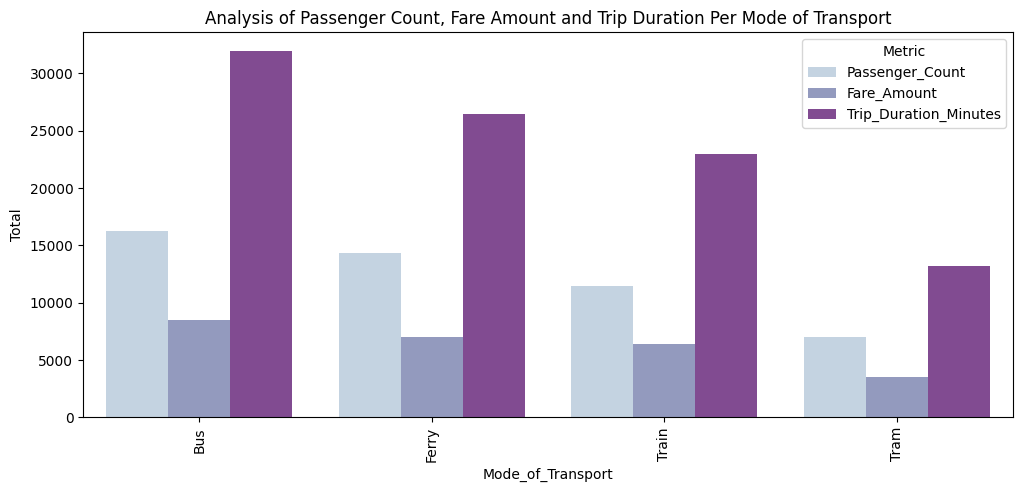

In [76]:
# Create a figure with specified size (12x5 inches)
plt.figure(figsize = (12,5))

# Group data by transportation mode and sum passenger count, fare amount, and trip duration
mode_trans = df.groupby("Mode_of_Transport")[["Passenger_Count","Fare_Amount","Trip_Duration_Minutes"]].sum().reset_index()

# Reshape the data from wide to long format for easier plotting with seaborn
mode_trans1 = pd.melt(mode_trans, id_vars = "Mode_of_Transport", var_name = "Metric", value_name = "Total")

# Create a grouped bar chart showing the total values for each metric by transportation mode
sns.barplot(data = mode_trans1, x = "Mode_of_Transport", y = "Total", hue = "Metric", palette = "BuPu")
plt.title("Analysis of Passenger Count, Fare Amount and Trip Duration Per Mode of Transport")

# Rotate x-axis labels by 90 degrees to prevent overlap
plt.xticks(rotation = 90);

##### **Interpretation**

The chart highlights key data on passenger counts, fare amounts, and trip durations across four transport modes: buses, ferries, trains, and trams. Buses lead in passenger counts and trip durations, emphasising their importance as the most popular mode of transport. Ferries follow closely, showing significant usage but slightly lower demand than buses. Trains have moderate numbers in all categories, indicating steady but less frequent use. Trams rank the lowest, reflecting limited usage and shorter trip durations, which affects their fare revenue. Overall, this data illustrates the dominance of buses in public transport and suggests the need to improve tram services to meet community needs better.


#### Departure Station for Passenger Count, Fare Amount and Trip Duration Per Minute

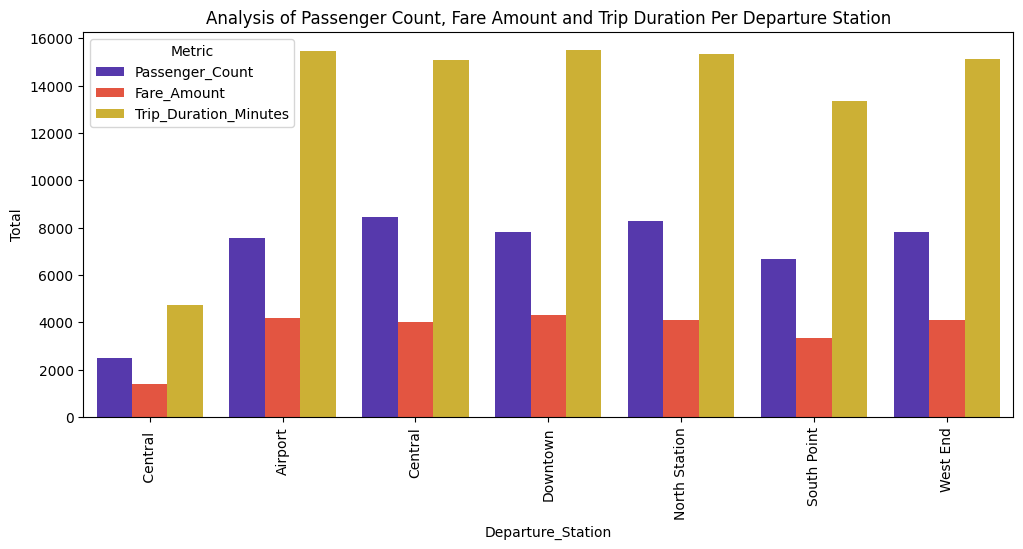

In [77]:
# Create a figure with specified size
plt.figure(figsize = (12,5))

# Group data by departure station and sum passenger count, fare amount, and trip duration
mode_trans = df.groupby("Departure_Station")[["Passenger_Count","Fare_Amount","Trip_Duration_Minutes"]].sum().reset_index()

# Reshape the data from wide to long format for easier plotting with seaborn
mode_trans1 = pd.melt(mode_trans, id_vars = "Departure_Station", var_name = "Metric", value_name = "Total")

# Create a bar plot showing the total values for each metric by departure station
sns.barplot(data = mode_trans1, x = "Departure_Station", y = "Total", hue = "Metric", palette = "CMRmap")
plt.title("Analysis of Passenger Count, Fare Amount and Trip Duration Per Departure Station")

# Rotate x-axis labels by 90 degrees to prevent overlap
plt.xticks(rotation = 90);

##### **Interpretation**

The chart effectively illustrates the total passenger counts, fare amounts, and trip durations across various departure stations. It is clear that Airport, Downtown, North Station, and West End stand out as major transit hubs, consistently ranking high across all three metrics. This suggests they are not only heavily utilised but also play a crucial role in generating revenue and in longer trip durations for riders. 

Conversely, Central exhibits significantly lower totals—particularly in trip duration—implying it experiences lighter traffic or primarily shorter journeys. South Point, while still lower in figures, performs better than Central. 

The striking similarity in bar heights across these stations reveals an important trend: stations with higher passenger counts also tend to generate larger fare totals and contribute to longer trip durations. This underscores a compelling relationship between station demand and overall service utilisation, highlighting the importance of focusing on major transit hubs for future improvements.


#### Arrival Station for Passenger Count, Fare Amount and Trip Duration Per Minute

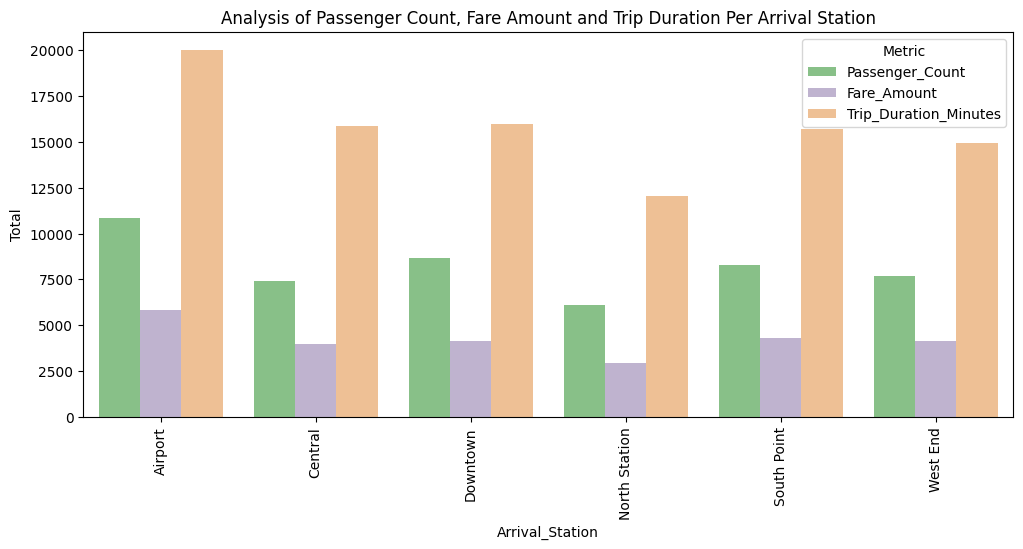

In [78]:
# Create a figure with specified size (12x5 inches)
plt.figure(figsize = (12,5))

# Group data by arrival station and sum passenger count, fare amount, and trip duration
mode_trans = df.groupby("Arrival_Station")[["Passenger_Count","Fare_Amount","Trip_Duration_Minutes"]].sum().reset_index()

# Reshape the dataframe from wide to long format for easier plotting with seaborn
mode_trans1 = pd.melt(mode_trans, id_vars = "Arrival_Station", var_name = "Metric", value_name = "Total")

# Create a grouped bar chart showing the metrics for each arrival station
sns.barplot(data = mode_trans1, x = "Arrival_Station", y = "Total", hue = "Metric", palette = "Accent")
plt.title("Analysis of Passenger Count, Fare Amount and Trip Duration Per Arrival Station")

# Rotate x-axis labels by 90 degrees to prevent overlap
plt.xticks(rotation = 90);

##### **Interpretation**

The chart provides a clear comparative analysis of Passenger Count, Fare Amount, and Trip Duration (in minutes) across six key arrival stations: Airport, Central, Downtown, North Station, South Point, and West End. Each metric highlights essential transportation insights.

1. **Passenger Count**  
   - **Highest:** The Airport leads with the largest passenger volume, confirming its status as the busiest hub.  
   - **Moderate:** Downtown and South Point follow with strong numbers, emphasizing their significance.  
   - **Lowest:** North Station has the fewest passengers, indicating potential issues like lower service frequency.

2. **Fare Amount**  
   Fare revenue trends align closely with passenger counts:  
   - The Airport again tops the list for total fare revenue, showcasing its economic impact.  
   - North Station's low passenger traffic results in the lowest fare total, reinforcing that higher passenger numbers drive revenue.

3. **Trip Duration (Minutes)**  
   Trip durations are higher than other metrics, as they reflect total time:  
   - The Airport has the highest trip duration, indicating longer distances or higher trip frequency.  
   - Central and Downtown show similar durations, suggesting common commuting behaviours, while North Station’s duration aligns with its lower passenger count.

4. **Overall Patterns & Insights**  
   The Airport's dominance across all metrics reinforces its central role. A strong relationship exists between passenger volume and fare revenue, affirming transit economics. Stations with fewer passengers also demonstrate lower fare totals and trip durations, indicating consistent usage patterns. Minor fare total differences suggest a largely uniform pricing structure, promoting fairness in service charges.

These insights can guide stakeholders in improving services and optimising transit operations, ultimately benefiting both passengers and the transportation network.


#### Daily Trip By Passenger Count, Fare Amount and Trip Duration per Day

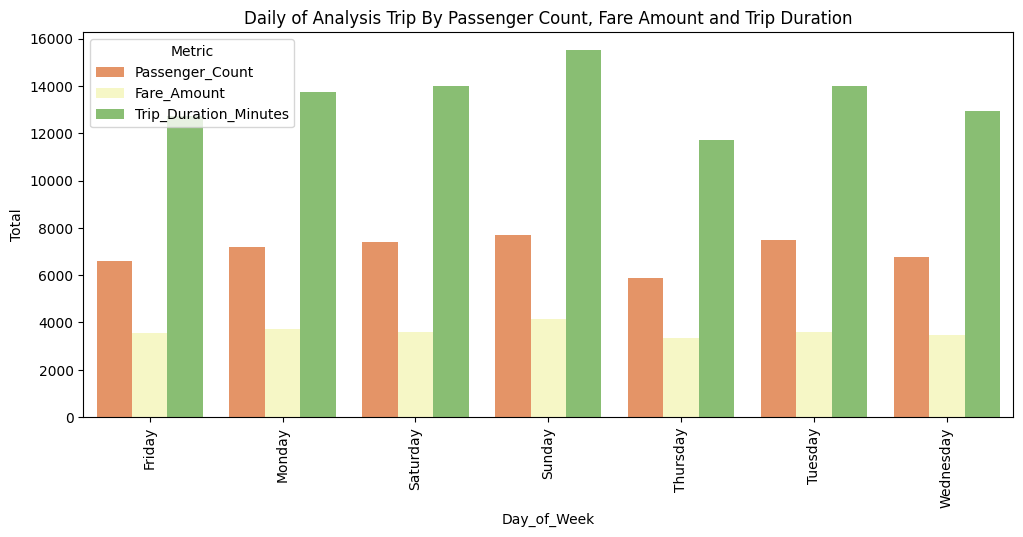

In [79]:
# Create a figure with specified size (12x5 inches)
plt.figure(figsize = (12,5))

# Group data by day of week and sum passenger count, fare amount, and trip duration
mode_trans = df.groupby("Day_of_Week")[["Passenger_Count","Fare_Amount","Trip_Duration_Minutes"]].sum().reset_index()

# Reshape the data from wide to long format for easier plotting with seaborn
mode_trans1 = pd.melt(mode_trans, id_vars = "Day_of_Week", var_name = "Metric", value_name = "Total")

# Create a bar plot showing the total values for each metric by day of week
sns.barplot(data = mode_trans1, x = "Day_of_Week", y = "Total", hue = "Metric", palette = "RdYlGn")
plt.title("Daily of Analysis Trip By Passenger Count, Fare Amount and Trip Duration")

# Rotate x-axis labels by 90 degrees to prevent overlap
plt.xticks(rotation = 90);

##### **Interpretation**

- The graph clearly shows that Sunday is the busiest and most profitable day of the week, consistently recording the highest passenger counts, fare revenue, and total trip durations.
- Following Sunday, Monday, Saturday, and Tuesday also show strong activity, but they cannot match the levels seen on Sunday.
- In contrast, Thursday falls behind, with the lowest totals across all three metrics, making it the slowest day for ridership and revenue.
- These trends indicate that demand peaks on weekends, especially Sunday, while mid-week activity drops significantly, particularly on Thursday.


#### Daily Time Series Plots of Fare Amount and Passenger Count Per Trip Dates

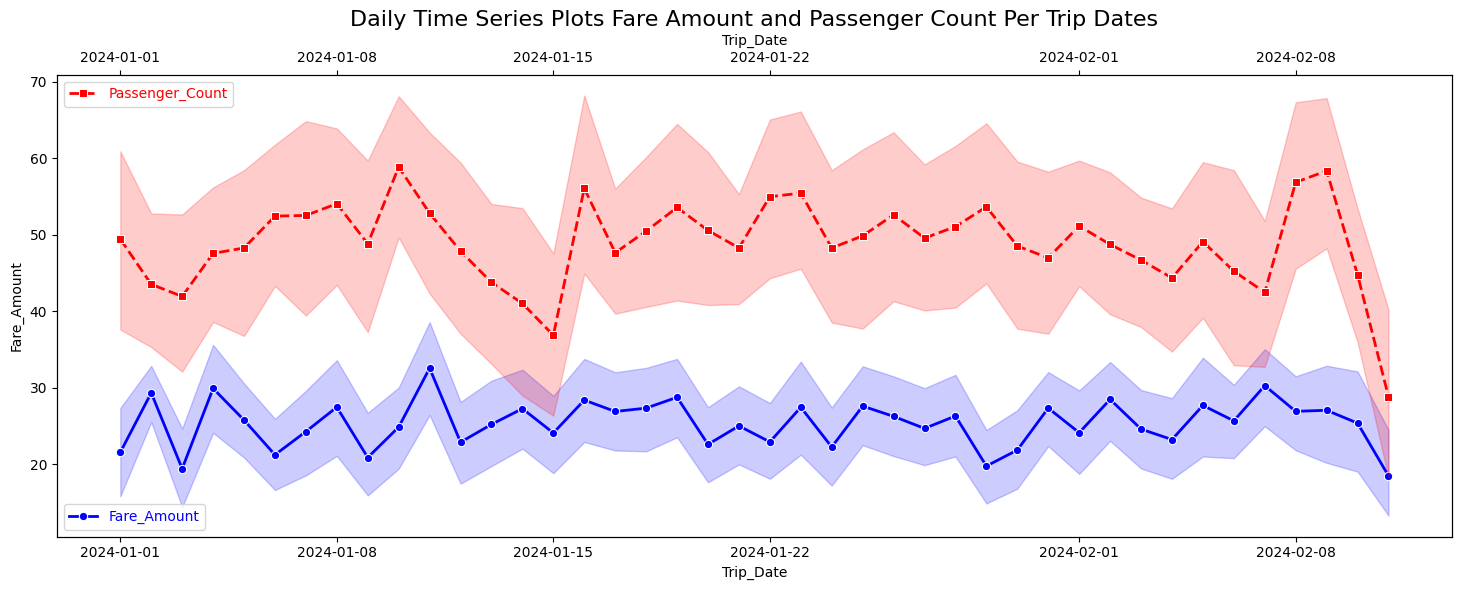

In [80]:
# Create a figure with a single subplot and set its size to 18x6 inches
fig, ax = plt.subplots(figsize = (18,6))

# Plot the first line chart showing Passenger_Count over time
# Uses blue color with circle markers and line width of 2
sns.lineplot(x = "Trip_Date", y = "Fare_Amount", data = df, color = "blue", marker = "o", linewidth = 2)
plt.legend(labels = ["Fare_Amount"], loc = "lower left", labelcolor = "blue")

# Create a twin x-axis for the second plot
# This allows plotting two different y-variables against the same x-axis
ax2 = ax.twiny()

# Plot the second line chart showing Fare_Amount over time
# Uses red color with square markers, dashed line style and line width of 2
sns.lineplot(x = "Trip_Date", y ="Passenger_Count", data = df, color = "red", marker = "s", linestyle = "--", linewidth = 2, ax = ax2)
plt.legend(labels = ["Passenger_Count"], loc = "upper left", labelcolor = "red")
plt.title("Daily Time Series Plots Fare Amount and Passenger Count Per Trip Dates", fontsize = 16)
# Display the plot
plt.show();

##### **Interpretation**

The chart effectively highlights daily trends in fare amounts and passenger counts, offering crucial insights into transit dynamics. Passenger counts, shown in red, consistently surpass fare amounts and exhibit greater variability, indicated by a wider confidence band. Peaks in passenger volume suggest days of increased demand, followed by declines that may reflect lower ridership or weekly patterns.

In contrast, fare amounts, depicted in blue, demonstrate a more stable trend with smaller fluctuations. Although fares can fluctuate slightly, they generally remain within a narrow range. The correlation between fare increases and rising passenger counts points to a relationship between ridership and revenue, even as fare changes are moderate.

Overall, the graph shows that while passenger counts vary significantly day to day, fare amounts remain steady, suggesting periodic peaks likely driven by recurring demand cycles. This information is vital for effective transit management and pricing strategies.


#### Time Series Plot of Fare Amount and Trip Duration Per Trip Dates

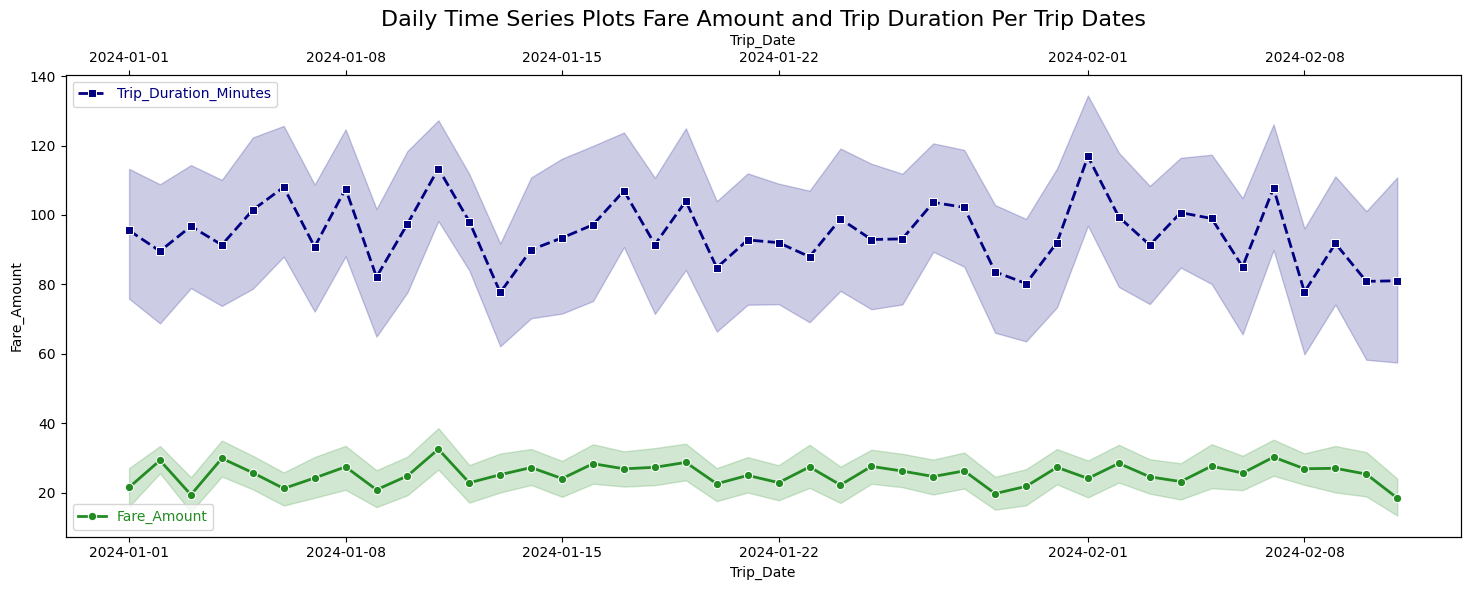

In [81]:
# Create a figure with a single subplot and set its size
fig, ax = plt.subplots(figsize = (18,6))

# Plot the first line chart showing Fare Amount over time
# Using forestgreen color with circle markers and line width of 2
sns.lineplot(x = "Trip_Date", y = "Fare_Amount", data = df, color = "forestgreen", marker = "o", linewidth = 2)
plt.legend(labels = ["Fare_Amount"], loc = "lower left", labelcolor = "forestgreen")

# Create a twin x-axis for the second plot
# This allows plotting two different y-variables against the same x-axis
ax2 = ax.twiny()

# Plot the second line chart showing Trip Duration over time
# Using navy color with square markers, dashed line style and line width of 2
sns.lineplot(x = "Trip_Date", y ="Trip_Duration_Minutes", data = df, color = "navy", marker = "s", linestyle = "--", linewidth = 2, ax = ax2)
plt.legend(labels = ["Trip_Duration_Minutes"], loc = "upper left", labelcolor = "navy")
plt.title("Daily Time Series Plots Fare Amount and Trip Duration Per Trip Dates", fontsize = 16)

# Display the plot
plt.show();

##### **Interpretation**
The chart shows that average daily fare amounts remain stable throughout the observed period, fluctuating modestly between roughly 18 and 35 units with relatively low variability, indicating consistent pricing or trip characteristics. In contrast, average daily trip durations display substantially greater variability, ranging from approximately 75 to 130 minutes and experiencing frequent sharp increases and decreases. Despite these fluctuations in duration, fare amounts do not show corresponding volatility, suggesting that fares are not strongly tied to trip duration or that the pricing model dampens duration-driven changes. Overall, the graph highlights steady fare behaviour alongside highly variable trip durations, with no significant long-term trends in either metric.


#### Correlation Analysis

In [82]:
# First, check if the columns exist in the numeric data
numeric_data = df.select_dtypes(include="number")

# Define columns that should be excluded from numeric analysis
columns_to_drop = ["Year", "Month"]
# Filter the list to only include columns that actually exist in numeric_data
columns_to_drop = [col for col in columns_to_drop if col in numeric_data.columns]
# Remove these columns from the numeric dataset
numeric_data = numeric_data.drop(columns=columns_to_drop)

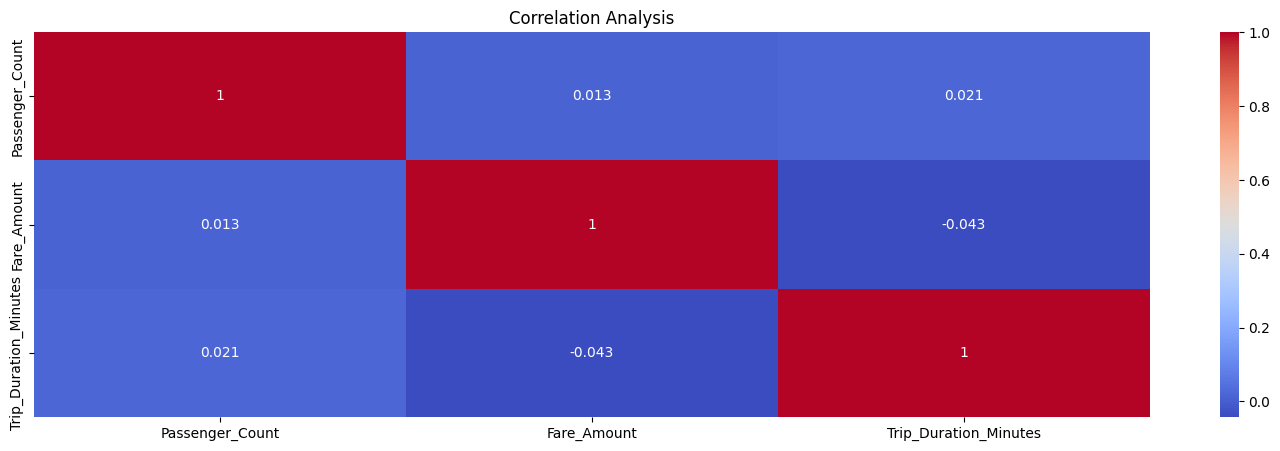

In [83]:
# Calculate the correlation matrix between all numeric variables
correlation_map = numeric_data.corr()

# Create a figure with specified dimensions (18x5 inches)
plt.figure(figsize = (18,5))

# Generate a heatmap visualization of the correlation matrix
# annot=True displays the correlation values in each cell
# cmap="coolwarm" sets the color scheme (blue for negative, red for positive correlations)
sns.heatmap(correlation_map, annot = True, cmap = "coolwarm")

# Add a title to the heatmap
plt.title("Correlation Analysis")

# Display the heatmap
plt.show()

##### **Interpretations**

- The data analysis reveals that Passenger Count has virtually no correlation with either Fare Amount (0.013) or Trip Duration in Minutes (0.021). This finding strongly suggests that the number of passengers does not significantly affect trip length or cost.

- Moreover, there is a very small negative correlation between Fare Amount and Trip Duration in Minutes (-0.043). This indicates that longer trips do not reliably result in higher or lower fares; in fact, fare and duration appear to be almost entirely unrelated within this dataset.

- As anticipated, the diagonal values are all 1, confirming that each variable is perfectly correlated with itself.

- In conclusion, the overall results compellingly demonstrate that there are no strong linear relationships among Passenger Count, Fare Amount, and Trip Duration in this dataset.


# Conclusions

### **Categorical - Univariate** 
- Demand varies significantly across days and months, highlighting strong seasonal patterns that require careful planning. 

- The airport is vital for city travel, underscoring its critical role in connectivity. 

- North Station serves as a key commuter hub, with many departures but few arrivals, underscoring the need for improved arrival services. 

- Central Station is underutilised, suggesting opportunities for enhancing its structural and service offerings. 

- Bus transport remains the primary mode of mobility, underscoring its importance in our operational strategies. 

- February's decline in travel demand may impact revenue, making predictive planning and flexible resource allocation essential.

### **Numerical - Univariate**

This transport service conveys a strong message:

- It reliably serves around 50 passengers per trip, showcasing its dependability.
- Consistent mid-range fares provide great value and enhance customer satisfaction.
- With an average trip duration of 1.5 hours, it effectively covers medium-to-long distances.

This combination creates a balanced and predictable system, ideal for forecasting revenue, planning fleet capacity, and optimising routes.
Stable pricing eliminates volatility, while consistent demand enables efficient scheduling and resource planning. Reliable trip durations further emphasise operational efficiency.

### **Categorical & Numeric - Bivariate**

##### High-Value Corridors Identified  
The Airport, Central, and West End are the most valuable corridors in our network, consistently showing the highest fares, strong passenger activity, and longer trip durations. These stations are essential for maximizing our economic impact.

##### Mode-Specific Demand Patterns  
Tram and Ferry services lead in passenger volume, while Train services command higher fares despite lower ridership, indicating a premium offering that can be optimized for specific markets.

##### Trip Duration Trends  
Bus and Tram routes face longer travel times due to congestion and operational challenges. In contrast, Train and Ferry services are more efficient, signalling an opportunity to enhance bus and tram operations.

##### Network Performance Imbalance  
Certain modes and stations experience high demand while others do not, revealing opportunities for improved load balancing, scheduling, and targeted investments.

The daily transport analysis reveals opportunities to enhance our fare structures, passenger flows, and trip durations across the week. Key insights include:  
- **Thursday** shows the highest fares and longest trip durations, indicating demand for longer-distance travel.  
- **Monday and Tuesday** reflect significant commuter activity with increased fares and durations.  
- **Saturday** attracts the most passengers, primarily for leisure travel, while  
- **Friday** sees lighter travel with shorter average trip durations.  
Overall, our system balances weekday commuter needs with weekend leisure spikes, offering pathways to optimise efficiency and service quality.  

### **Trend Analysis**

**Fare Amount Trend**  
Fare amounts have remained stable during the analysis period, with only minor daily fluctuations. The cyclical peaks and troughs indicate that demand patterns influence variations rather than pricing issues, reflecting a dependable pricing structure.

**Passenger Count Trend**  
Passenger counts exhibit volatility, with distinct peaks and occasional declines, yet the overall trend remains stable. Significant dips suggest operational or seasonal factors at play, offering an opportunity to enhance the passenger experience.

**Trip Duration Trend**

Trip durations have high variability, indicating that traffic conditions or route congestion may be affecting travel times. While there is no clear trend of improvement or decline, addressing these external factors could enhance service efficiency.
The analysis reveals a stable system across fares, passenger volume, and trip durations. However, this variability highlights valuable opportunities for optimisation. With steady demand, stable pricing, and potential for greater efficiency, we are well-positioned to better serve our passengers.

### **Relationship Plots**

The Analysis highlights key findings:
- There is little correlation between fare amounts, passenger counts, and trip durations.
- Fare pricing operates independently of factors like duration and demand.
- Passenger volumes are stable regardless of fare or trip length, indicating that external factors, such as commuting needs, drive ridership more than system attributes.


### **Multivariate Analysis**


**Daily Trends**
   - Sundays show the highest passenger volume, fare revenue, and trip durations, highlighting strong weekend demand. Conversely, Thursdays underperform, suggesting opportunities for improvement.
   - Weekdays maintain steady demand but do not reach weekend peaks, indicating potential for growth during the workweek.

**Mode of Transport**
   - Buses are the most utilised and highest revenue-generating mode, with the longest trip durations, showcasing their importance in commuting.
   - Ferries also perform well, generating high fare totals relative to passenger counts. In contrast, trams perform poorly, indicating a need for reassessment and potential improvements.

**Arrival Stations**
   - The airport leads in passenger volume and trip durations, affirming its status as a major destination that needs further investment.
   - South Point also shows strong demand, while Central and North Stations have lower totals, indicating opportunities for refinement or enhancement.

**Departure Stations**
   - The airport and Downtown are key departure hubs, excelling in both passengers and fare revenue, suggesting potential for expanded services.
   - Central station primarily serves shorter trips, indicating a need for focused development in local transport options. Overall, trip durations are stable, but airport-connected routes could benefit from targeted improvements.

### **Trend Analysis**

- **Stable Revenue Performance**  
   Our fare revenues show impressive stability despite fluctuations in ridership and trip duration, reflecting an effective pricing strategy and reliable passenger behaviour.

- **Weekly Demand Patterns**  
   Recognising that passenger demand follows a predictable weekly cycle gives us a strategic edge, enabling accurate demand forecasting based on clear weekday and weekend patterns.

- **Operational Challenges**  
   Spikes in trip duration indicate operational stress points, such as congestion or delays, that require immediate attention to enhance service quality.

- **Fair Fare Model**  
   Our flat-rate fare model ensures consistent pricing, providing passengers with predictability while effectively managing revenue exposure.

- **Consistent Operations**  
   The lack of significant price fluctuations indicates stable system performance, which is essential for maintaining passenger trust.

### **Correlation Analysis**

Fares, passenger load, and trip duration function independently, with no linear relationships among them. This deviates from traditional distance-based pricing, as fares seem disconnected from operational factors. Additionally, passenger demand does not significantly influence trip length or fare revenues, leading to two main observations:

- Trips likely follow standardised routes.
- Demand may not impact operational behaviour.



# Recommendations

### **Categorical - Univariate** 

**Service and Capacity Optimisation**  
We must increase weekend service frequency, especially on Saturdays and Sundays, to meet rising demand. On Thursdays, we should reduce capacity or optimise staffing due to lower demand. Additionally, scaling up bus operations is crucial, as they carry the largest volume of passengers.

**Seasonal Resource Planning**  
In January, we need to allocate high-capacity resources—vehicles and staff—to maximise efficiency. For February, we can implement cost containment and stimulate demand through promotions and adaptive scheduling.

**Station-Specific Enhancements**  
At the Airport, investing in connectivity and signage will improve the traveller experience. North Station should enhance arrival appeal with upgraded amenities. We need to investigate low utilisation at Central Station and address issues like marketing and scheduling.

**Transport Mode Strategy**  
Prioritising bus fleet upgrades and improved scheduling is essential to meet high demand. During peak tourism, enhancing ferry services will support visitors. We should also assess tram route efficiency and consider marketing or rerouting to boost usage.

**Customer Experience and Communication**  
To enhance customer experience, we should provide real-time travel updates during peak times and implement seasonal campaigns, such as discounts in February, to balance passenger flow and encourage ridership.

### **Numerical - Univariate**

**Optimise Fleet Allocation**  
To improve efficiency with an average of 50 passengers per route, assign appropriately sized vehicles and leverage data for optimal load balancing during peak hours.

**Consider Tiered Fare Options**  
With most fares around $25, introduce pricing tiers like express and off-peak discounts to unlock new revenue. Price sensitivity testing will help identify growth opportunities.

**Improve Time Predictability**  
To address trip duration variability, analyse route performance to reduce delays. Utilise technology like GPS traffic prediction and dynamic routing to enhance efficiency.

**Introduce Predictive Scheduling**  
By using historical data to forecast high-demand periods, we can dynamically adjust service frequency, improving customer satisfaction while minimising operational waste.

### **Categorical & Numeric - Bivariate**

**Operational Improvements**  
- Increase service frequency on high-demand routes, especially at Airport, Central, and Downtown.  
- Optimize Bus and Tram operations to reduce travel times and improve passenger experience.  

**Capacity & Resource Allocation**  
- Allocate resources primarily to Tram and Ferry services due to high ridership.  
- Introduce express services for longer routes, particularly to the Airport and Central.  

**Customer Experience Enhancements**  
- Enhance comfort and amenities on high-fare routes to match perceived value with pricing.  
- Improve information systems on slower modes to minimize perceived wait times.  

**Revenue Optimization**  
- Maintain premium pricing for Train services while exploring demand-based pricing for high-fare routes linked to the Airport.  

**Strategic Planning**  
- Designate Airport and Central as key interchange hubs for infrastructure investments and improved connectivity.  
- Use demand insights for effective capital planning and service reliability initiatives.


- **Operational Planning**  
    Increase service capacity on high-demand days (Monday, Tuesday, Saturday) and allocate resources for Thursday's long-distance journeys.  

- **Efficiency Improvements**  
   Address congestion on Thursday and early weekdays to reduce trip durations, and optimize Friday schedules by reallocating unused capacity.  

- **Customer Experience Enhancements**  
  Improve comfort features on long-duration days like Thursday, and offer promotions on low-demand days to stimulate usage.  

- **Revenue Optimization**  
 Maintain a stable fare structure while considering premium options for longer Thursday routes, and explore dynamic pricing for busy weekends.

### **Trend Analysis**

**Enhancing Operational Efficiency**
- Investigate sources of trip duration variability, such as traffic hotspots and congestion, to improve the travel experience.
- Optimise routes and adjust schedules to minimise fluctuations in trip durations.

**Strengthening Ridership Predictability**

- Analyse days with unusual passenger counts to identify service gaps and the influence of weather or events.
- Use predictive demand models to align fleet deployment with expected ridership levels.

**Maintaining Pricing Stability**

- Monitor fare stability to keep prices competitive and in line with customer expectations.
- Consider dynamic or incentive-based pricing during low-demand periods to boost ridership.

**Improving Customer Experience**

- Use trip duration data to detect and address excessively long travel times that affect customer satisfaction. 
- Enhance communication with real-time alerts, route alternatives, and delay notifications.

**Data-Driven Operational Reviews**

- Conduct monthly performance reviews to identify and respond to emerging patterns swiftly.
- Develop a comprehensive performance dashboard by integrating multimodal datasets for better decision-making.

### **Relationship Plots**

- **Reassess Fare Strategy**  
   Evaluate whether current pricing supports revenue goals, considering distance-based or dynamic pricing models to increase efficiency.

- **Conduct Demand Analysis**  
   Investigate ridership trends by route, time of day, and station pairs to better understand demand drivers.

- **Improve Operational Efficiency**  
   Address trip duration variability by assessing route congestion and scheduling practices to improve service quality.

- **Develop Demand Forecasting Models**  
   Create predictive models that incorporate variables such as weather, peak times, and socioeconomic factors, focusing on the most relevant drivers of demand.


### **Multivariate Analysis**

**Service & Operations**  
- Increase weekend capacity and frequency for long-distance routes to the airport and leisure destinations.  
- Optimise weekday schedules, particularly on Thursdays, to enhance efficiency and stimulate demand.  

**Transport Mode Strategy**  
- Focus on investing in the bus network through fleet expansion, route optimisation, and service enhancements.  
- Review tram performance to determine the need for changes in routes, frequency, or network structure.  
- Consider premium or dynamic fare options for high-demand services, like ferries.  

**Station-Focused Improvements**  
- Improve service reliability and capacity at key hubs, including the airport, downtown, and South Point.  
- Reassess low-performing stations, like Central and North Station, for potential redesigns or adjustments in service frequency.  

**Network Efficiency**  
- Investigate long trip durations on certain routes to identify congestion and scheduling gaps.  
- Use analytics to align vehicle allocation with demand patterns across stations and modes.

### **Trend Analysis**

- **Optimize Scheduling**  
   Revise schedules to align with demand patterns by increasing capacity on peak days and adjusting resources during low-demand periods.

- **Investigate Duration Spikes**  
   Conduct diagnostics on high-duration days to identify and address causes of delays and congestion.

- **Enhance Operational Reliability**  
   Implement real-time traffic management and improve dispatch coordination to enhance operational efficiency.

- **Review Fare Structure**  
   If operational costs rise for longer trips, consider distance-based supplements or optional premium services to increase revenue.

- **Leverage Predictive Planning**  
   Use insights from demand cycles to optimise fleet allocation, staff scheduling, and maintenance timing.

- **Strengthen Data Monitoring**  
   Install automated alerts for trip duration spikes and track correlations with external factors to enable timely operational adjustments.


### **Correlation Analysis**

**Revise Fare Policy**  
If fare amounts are meant to reflect trip duration, distance, or passenger volume, the current data indicates they do not. It’s vital to consider:
- Whether a flat-fare system remains effective.  
- The benefits of dynamic or distance-based pricing for fairer revenue distribution.

**Explore Hidden Relationships**  

The absence of strong linear correlations does not rule out:
- Non-linear relationships,
- Route-specific pricing,
- Fare variability based on time of day or station.
Taking these actions can enhance the efficiency and fairness of the fare structure.